In [632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from scipy import stats
from scipy.stats import linregress, t as t_dist
import statsmodels.api as sm
import pymannkendall as mk
import math
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format="retina"  # For high DPI display

In [633]:
temp_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "berkeleyearth/climate-change-earth-surface-temperature-data",
  "GlobalTemperatures.csv",
)

In [634]:
temp_df.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [635]:
temp_df.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

In [636]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [637]:
temp_df[temp_df.isna().any(axis=1)]

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
1195  1849-08-01                  13.603                              0.902   
1196  1849-09-01                  11.093                              0.568   
1197  1849-10-01                   8.890                              0.733   
1198  1849-11-01                   5.778                              1.313   
1199  1849-12-01                   1.923                              0.908   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
1195                 NaN                            NaN                 NaN   
1196                 NaN                            NaN                 NaN   
1197                 NaN                            NaN                 NaN   
1198                 NaN                            NaN                 NaN   
1199                 NaN                            NaN                 NaN   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
1195                            NaN                             NaN   
1196                            NaN                             NaN   
1197                            NaN                             NaN   
1198                            NaN                             NaN   
1199                            NaN                             NaN   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
1195                                        NaN  
1196                                        NaN  
1197                                        NaN  
1198                                        NaN  
1199                                        NaN  

[1200 rows x 9 columns]

In [638]:
temp_df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [639]:
temp_df[temp_df['LandAverageTemperature'].isnull()]

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
10  1750-11-01                     NaN                                NaN   
16  1751-05-01                     NaN                                NaN   
18  1751-07-01                     NaN                                NaN   
21  1751-10-01                     NaN                                NaN   
22  1751-11-01                     NaN                                NaN   
23  1751-12-01                     NaN                                NaN   
25  1752-02-01                     NaN                                NaN   
28  1752-05-01                     NaN                                NaN   
29  1752-06-01                     NaN                                NaN   
30  1752-07-01                     NaN                                NaN   
31  1752-08-01                     NaN                                NaN   
32  1752-09-01                     NaN                                NaN   

    LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
10                 NaN                            NaN                 NaN   
16                 NaN                            NaN                 NaN   
18                 NaN                            NaN                 NaN   
21                 NaN                            NaN                 NaN   
22                 NaN                            NaN                 NaN   
23                 NaN                            NaN                 NaN   
25                 NaN                            NaN                 NaN   
28                 NaN                            NaN                 NaN   
29                 NaN                            NaN                 NaN   
30                 NaN                            NaN                 NaN   
31                 NaN                            NaN                 NaN   
32                 NaN                            NaN                 NaN   

    LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
10                            NaN                             NaN   
16                            NaN                             NaN   
18                            NaN                             NaN   
21                            NaN                             NaN   
22                            NaN                             NaN   
23                            NaN                             NaN   
25                            NaN                             NaN   
28                            NaN                             NaN   
29                            NaN                             NaN   
30                            NaN                             NaN   
31                            NaN                             NaN   
32                            NaN                             NaN   

    LandAndOceanAverageTemperatureUncertainty  
10                                        NaN  
16                                        NaN  
18                                        NaN  
21                                        NaN  
22                                        NaN  
23                                        NaN  
25                                        NaN  
28                                        NaN  
29                                        NaN  
30                                        NaN  
31                                        NaN  
32                                        NaN

In [640]:
temp_df.dropna(subset=['LandAverageTemperature'], inplace=True)

In [641]:
temp_df_copy = temp_df.copy()

In [642]:
df = temp_df_copy[['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty']]

In [643]:
df.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty
0  1750-01-01                   3.034                              3.574
1  1750-02-01                   3.083                              3.702
2  1750-03-01                   5.626                              3.076
3  1750-04-01                   8.490                              2.451
4  1750-05-01                  11.573                              2.072

In [644]:
## Check if there are duplicate rows
df['dt'].duplicated().sum()

np.int64(0)

In [645]:
# Create a time variable (years since start)
df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['time_numeric'] = (df['dt'] - df['dt'].min()).dt.days / 365.25  # Convert to years

## Get annual data from the csv file

In [646]:
# Group data by year
annual = (
    df.groupby('year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .mean()
    .reset_index()
)

annual.head()

year  LandAverageTemperature  LandAverageTemperatureUncertainty
0  1750                8.719364                           2.637818
1  1751                7.976143                           2.781143
2  1752                5.779833                           2.977000
3  1753                8.388083                           3.176000
4  1754                8.469333                           3.494250

# Extract data for each decade from the csv file

## Boxplot for all data(original, monthly)

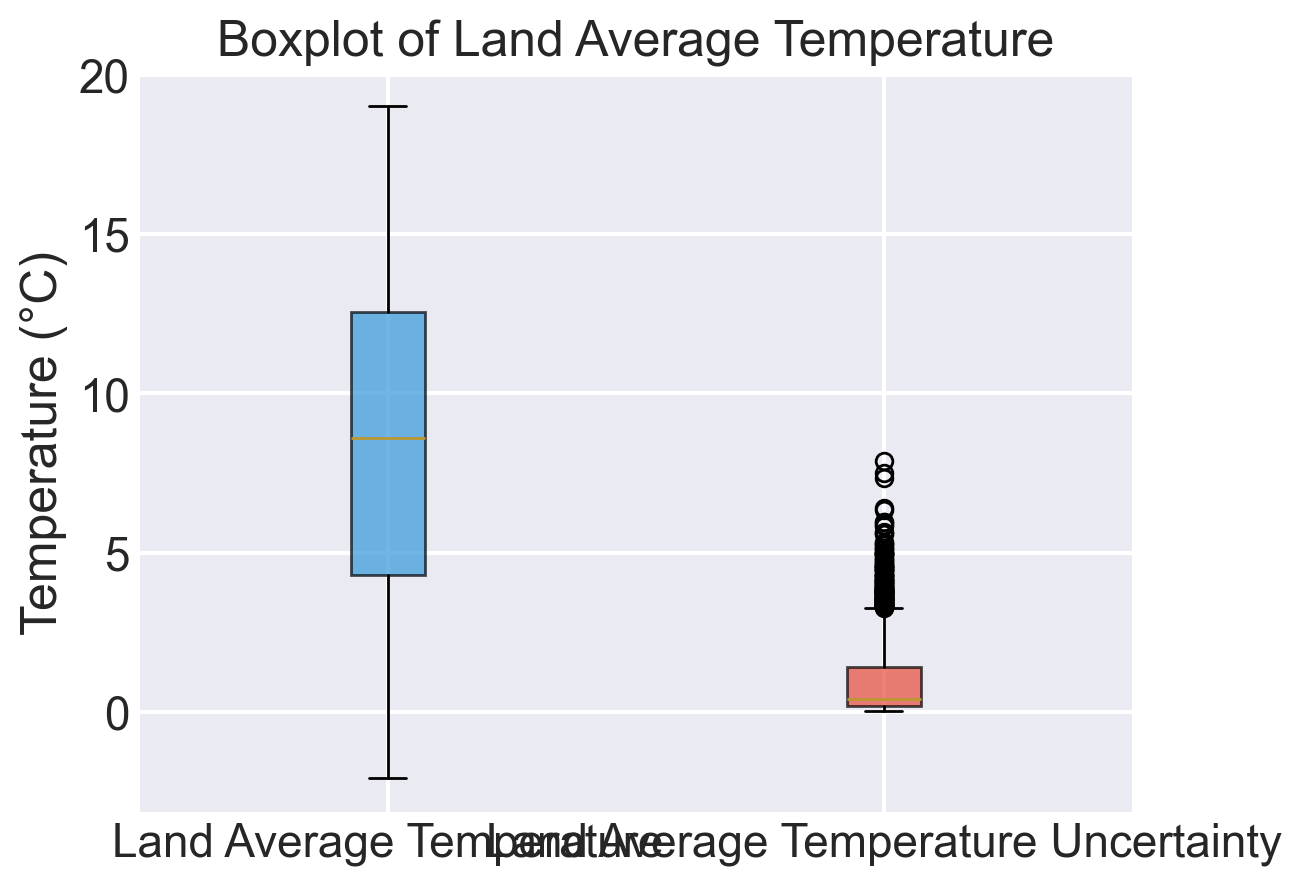

In [647]:
# Define colors for the two variables
colors = ['#3498db', '#e74c3c']  # Blue and Red

bp = plt.boxplot(x=df[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']], 
                 vert=True, patch_artist=True, 
                 labels=['Land Average Temperature', 'Land Average Temperature Uncertainty'])

# Apply colors to boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Boxplot of Land Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1210e7110>,
 'caps': [<matplotlib.lines.Line2D at 0x1210e6e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1210e6ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x1210e6c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1210e7250>],
 'means': []}

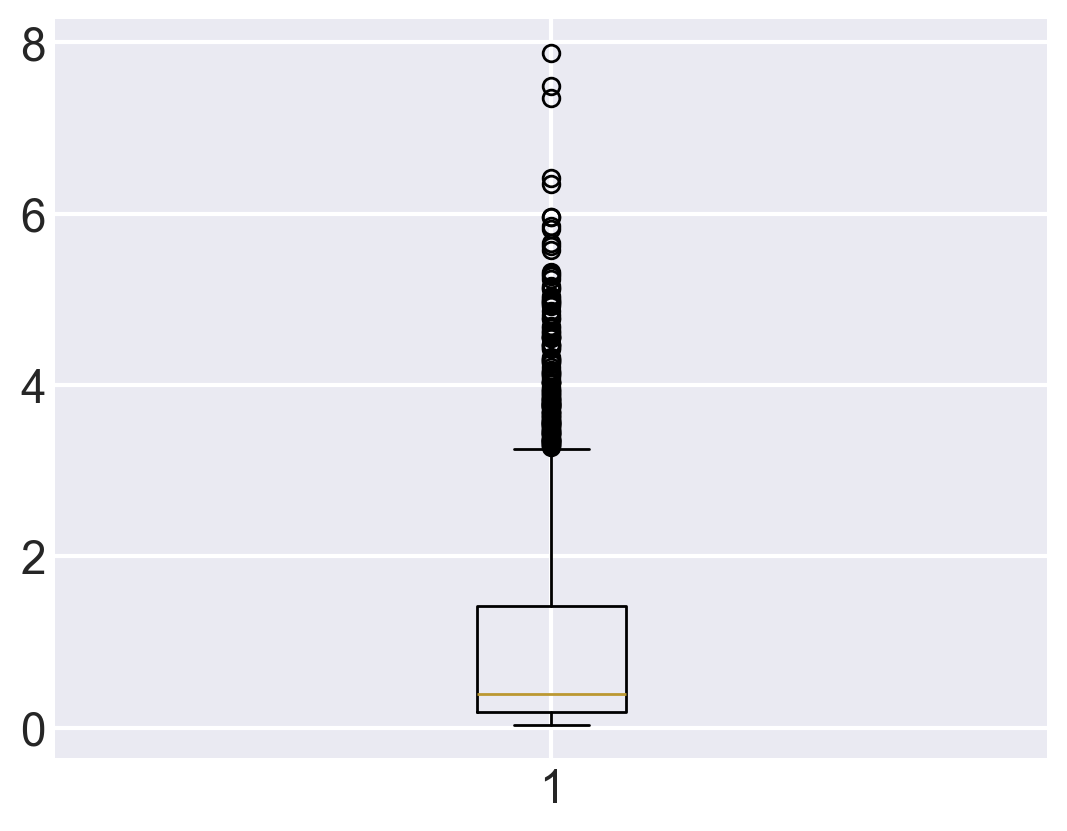

In [648]:
plt.boxplot(x=df['LandAverageTemperatureUncertainty'])

## Scatter plot for uncertainity over annual data

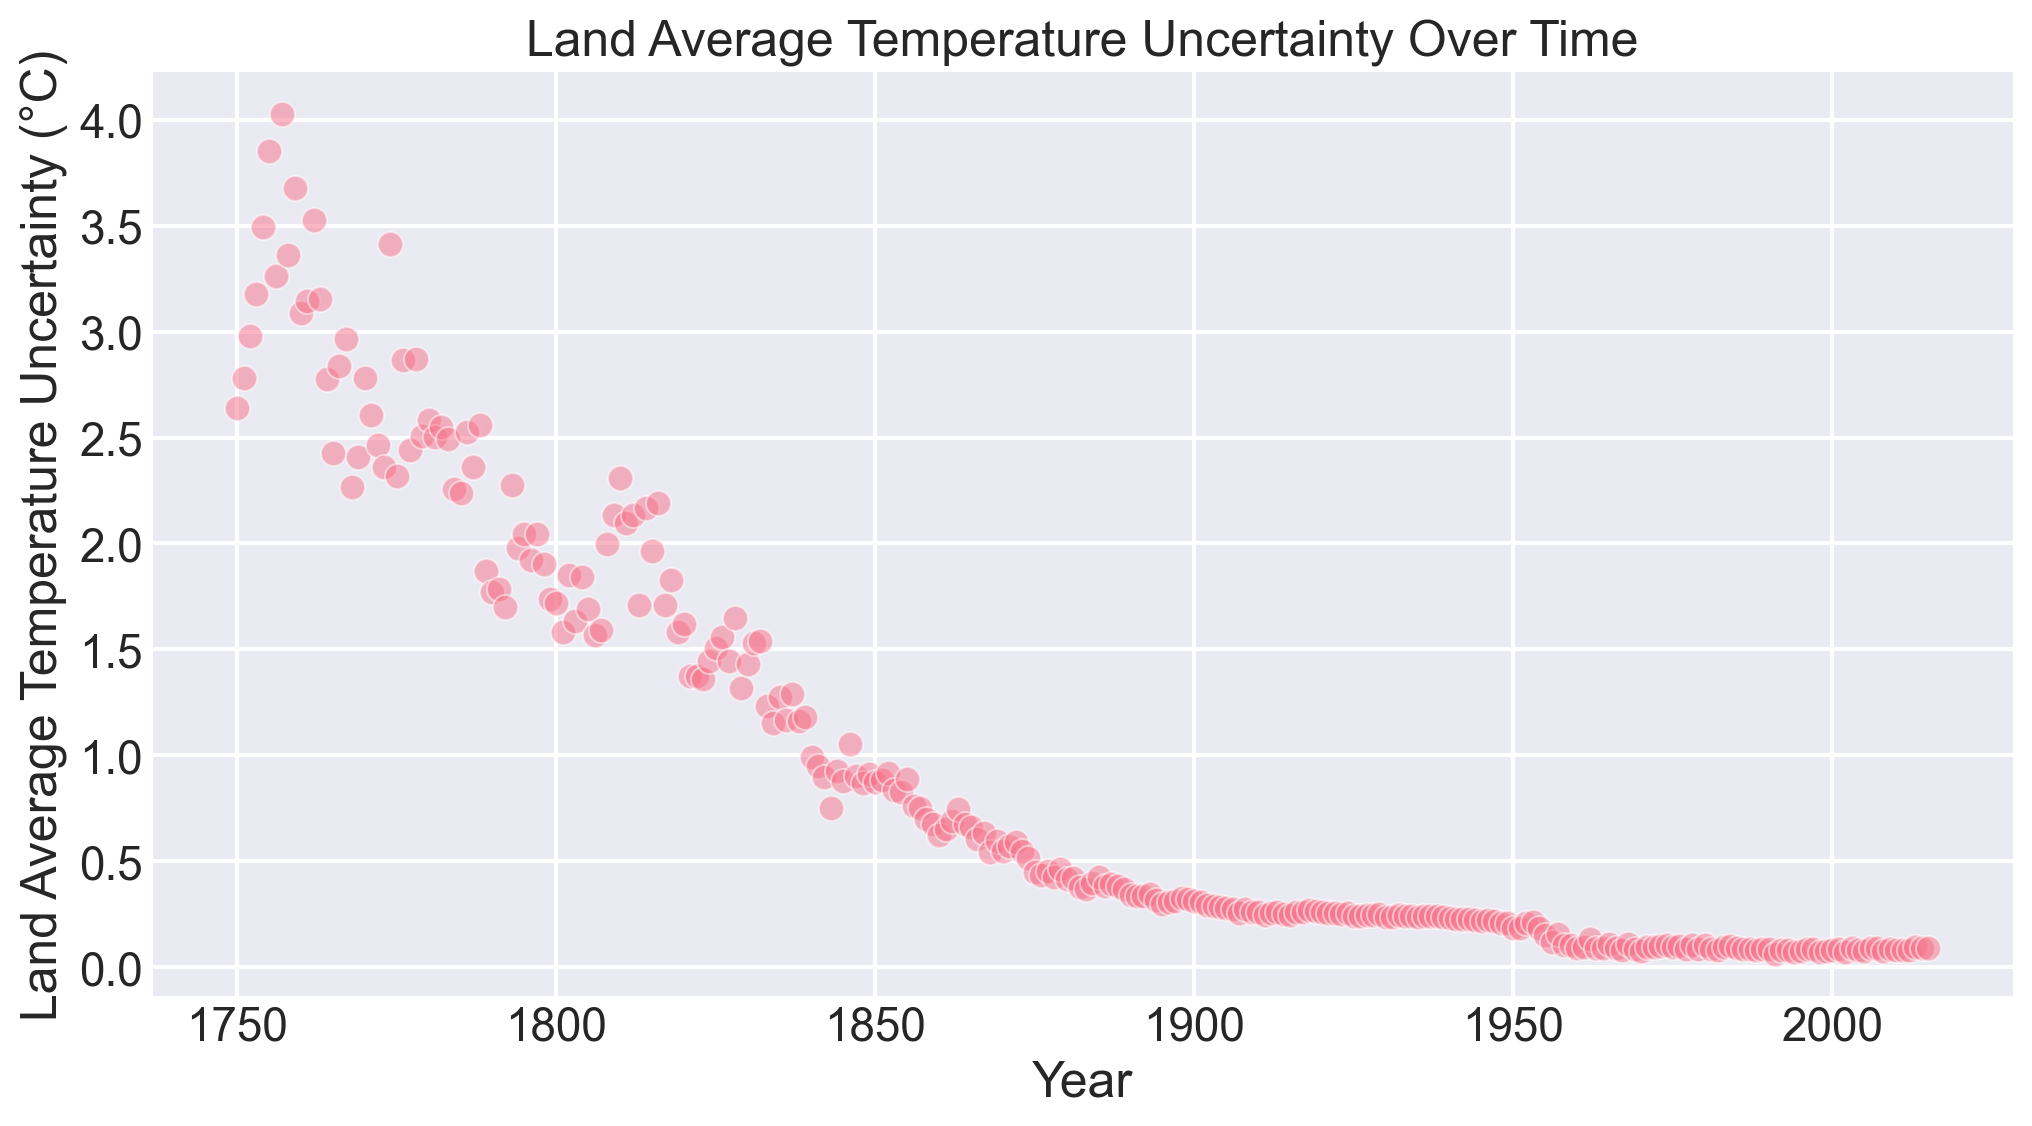

In [649]:
# Scatter plot land average temperature uncertainty across time

plt.figure(figsize=(12, 6))
sns.scatterplot(data=annual, x='year', y='LandAverageTemperatureUncertainty', alpha=0.5)
plt.title('Land Average Temperature Uncertainty Over Time')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature Uncertainty (°C)')
plt.show()

## Data visualization for original monthwise data

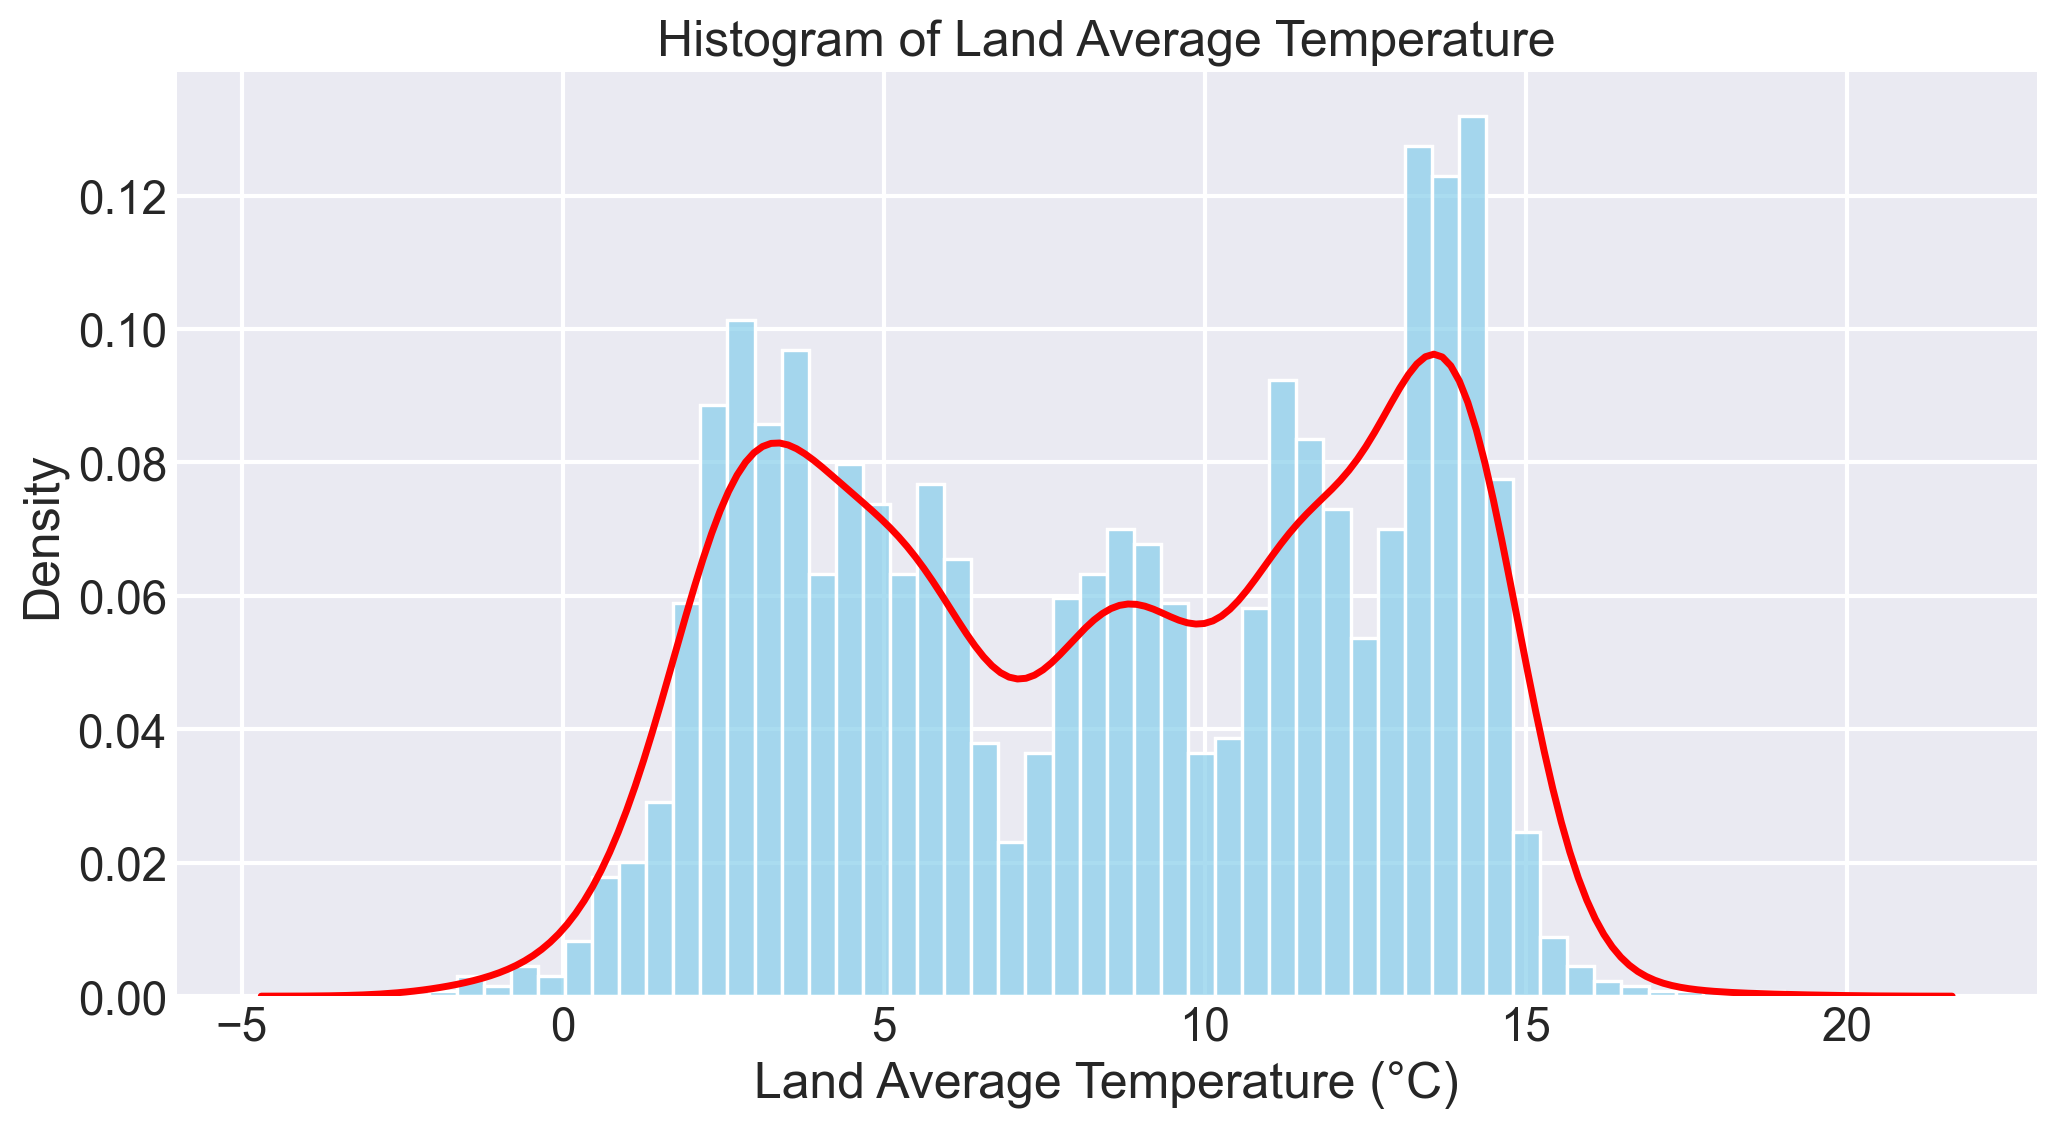

In [650]:
## Histogram of Land Average Temperature by date

plt.figure(figsize=(12,6))
# Plot histogram without KDE
sns.histplot(data=df, x='LandAverageTemperature', bins=50, color='skyblue', alpha=0.7, stat='density')
# Plot KDE separately with custom color
sns.kdeplot(data=df, x='LandAverageTemperature', color='red', linewidth=2.5)
plt.title('Histogram of Land Average Temperature')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Density')
plt.show()

## Data visualization for original annual data

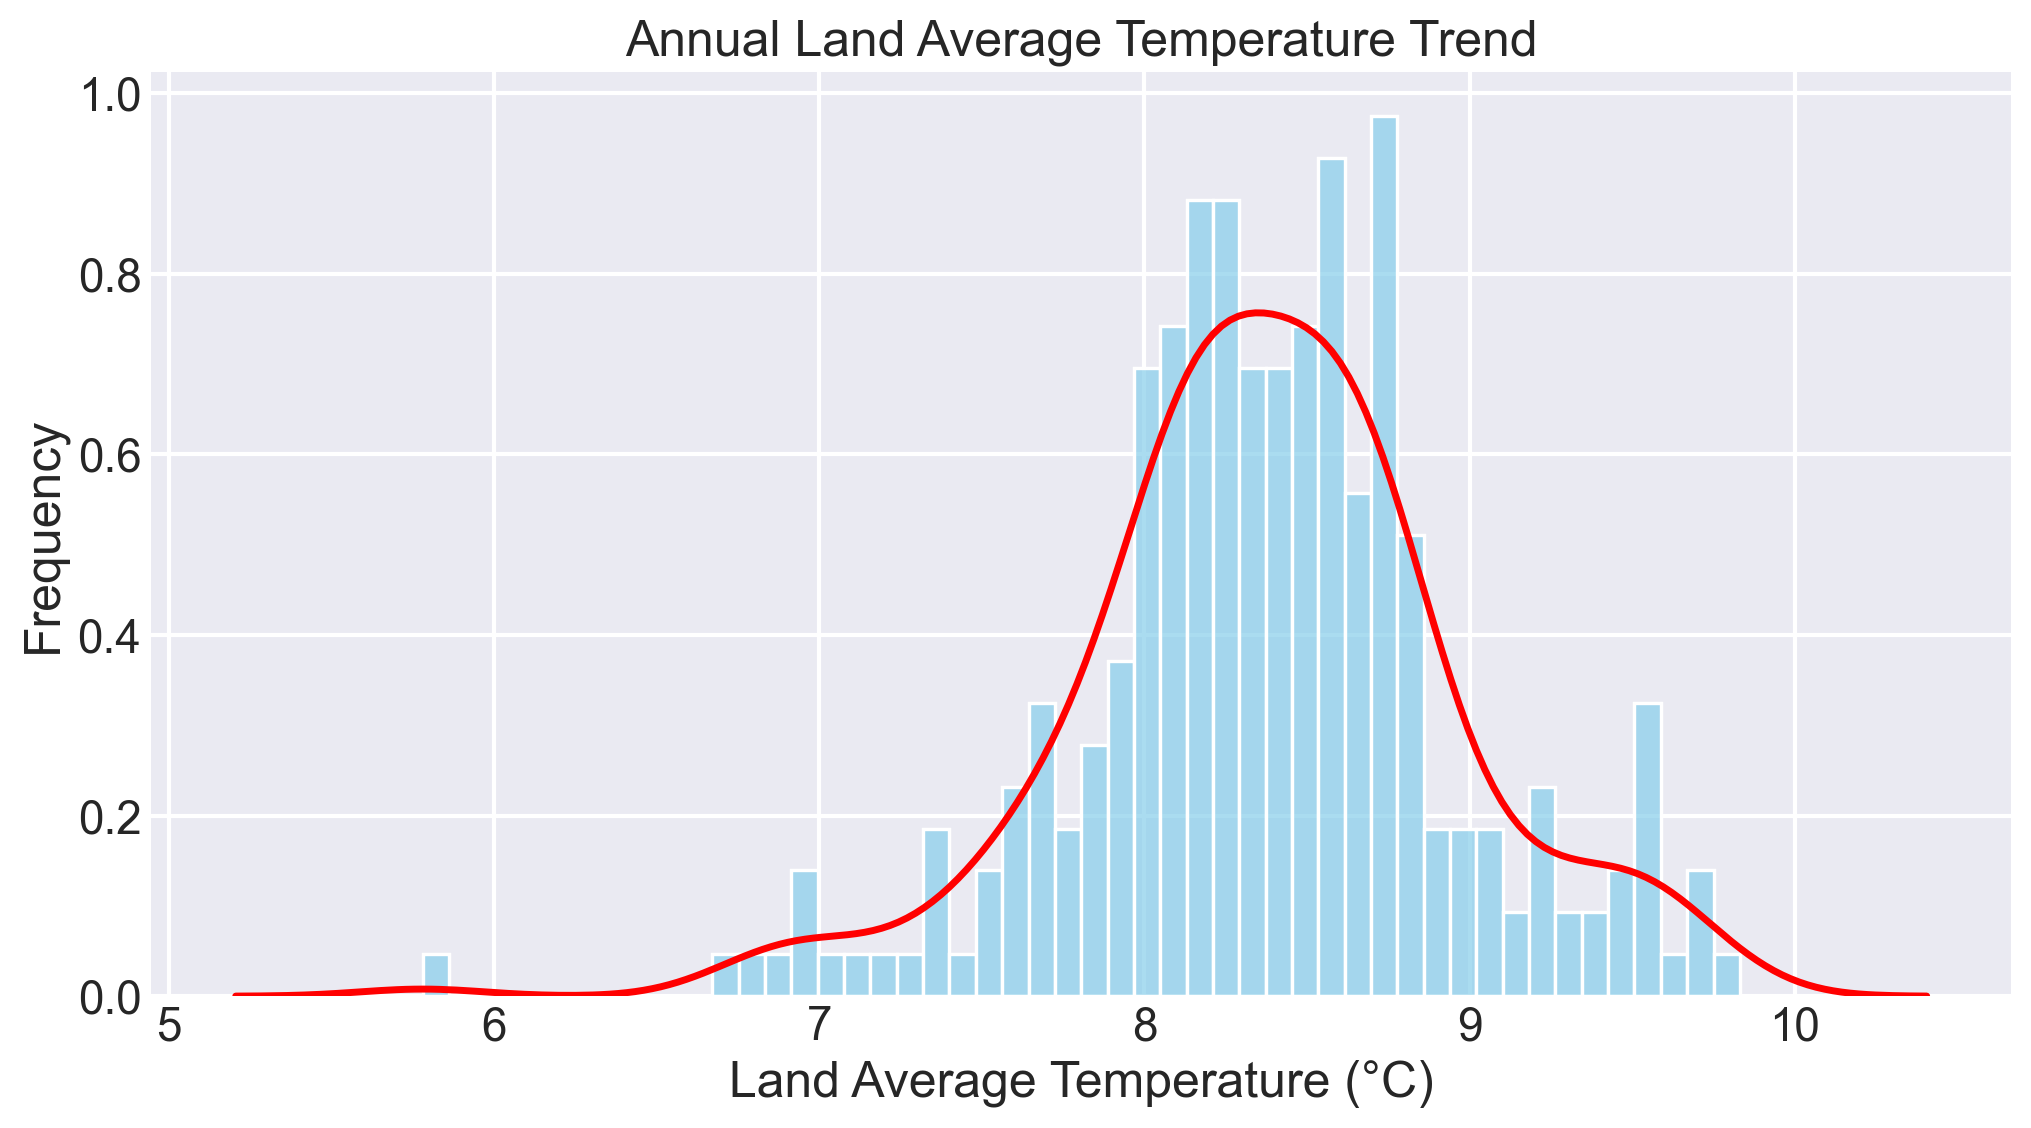

In [651]:
# Annual Land Average Temperature Trend

plt.figure(figsize=(12, 6))
sns.histplot(data=annual, x='LandAverageTemperature', bins=50, color='skyblue', alpha=0.7, stat='density')
sns.kdeplot(data=annual, x='LandAverageTemperature', color='red', linewidth=2.5)
plt.title('Annual Land Average Temperature Trend')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

## Data visualization for Decade data
- Decadal mean temperature

In [652]:
# Decade dataframe for decade analysis
decade = df.copy()
decade['decade'] = (decade['dt'].dt.year // 10) * 10
decade = (
    decade.groupby('decade')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .mean()
    .reset_index()
)

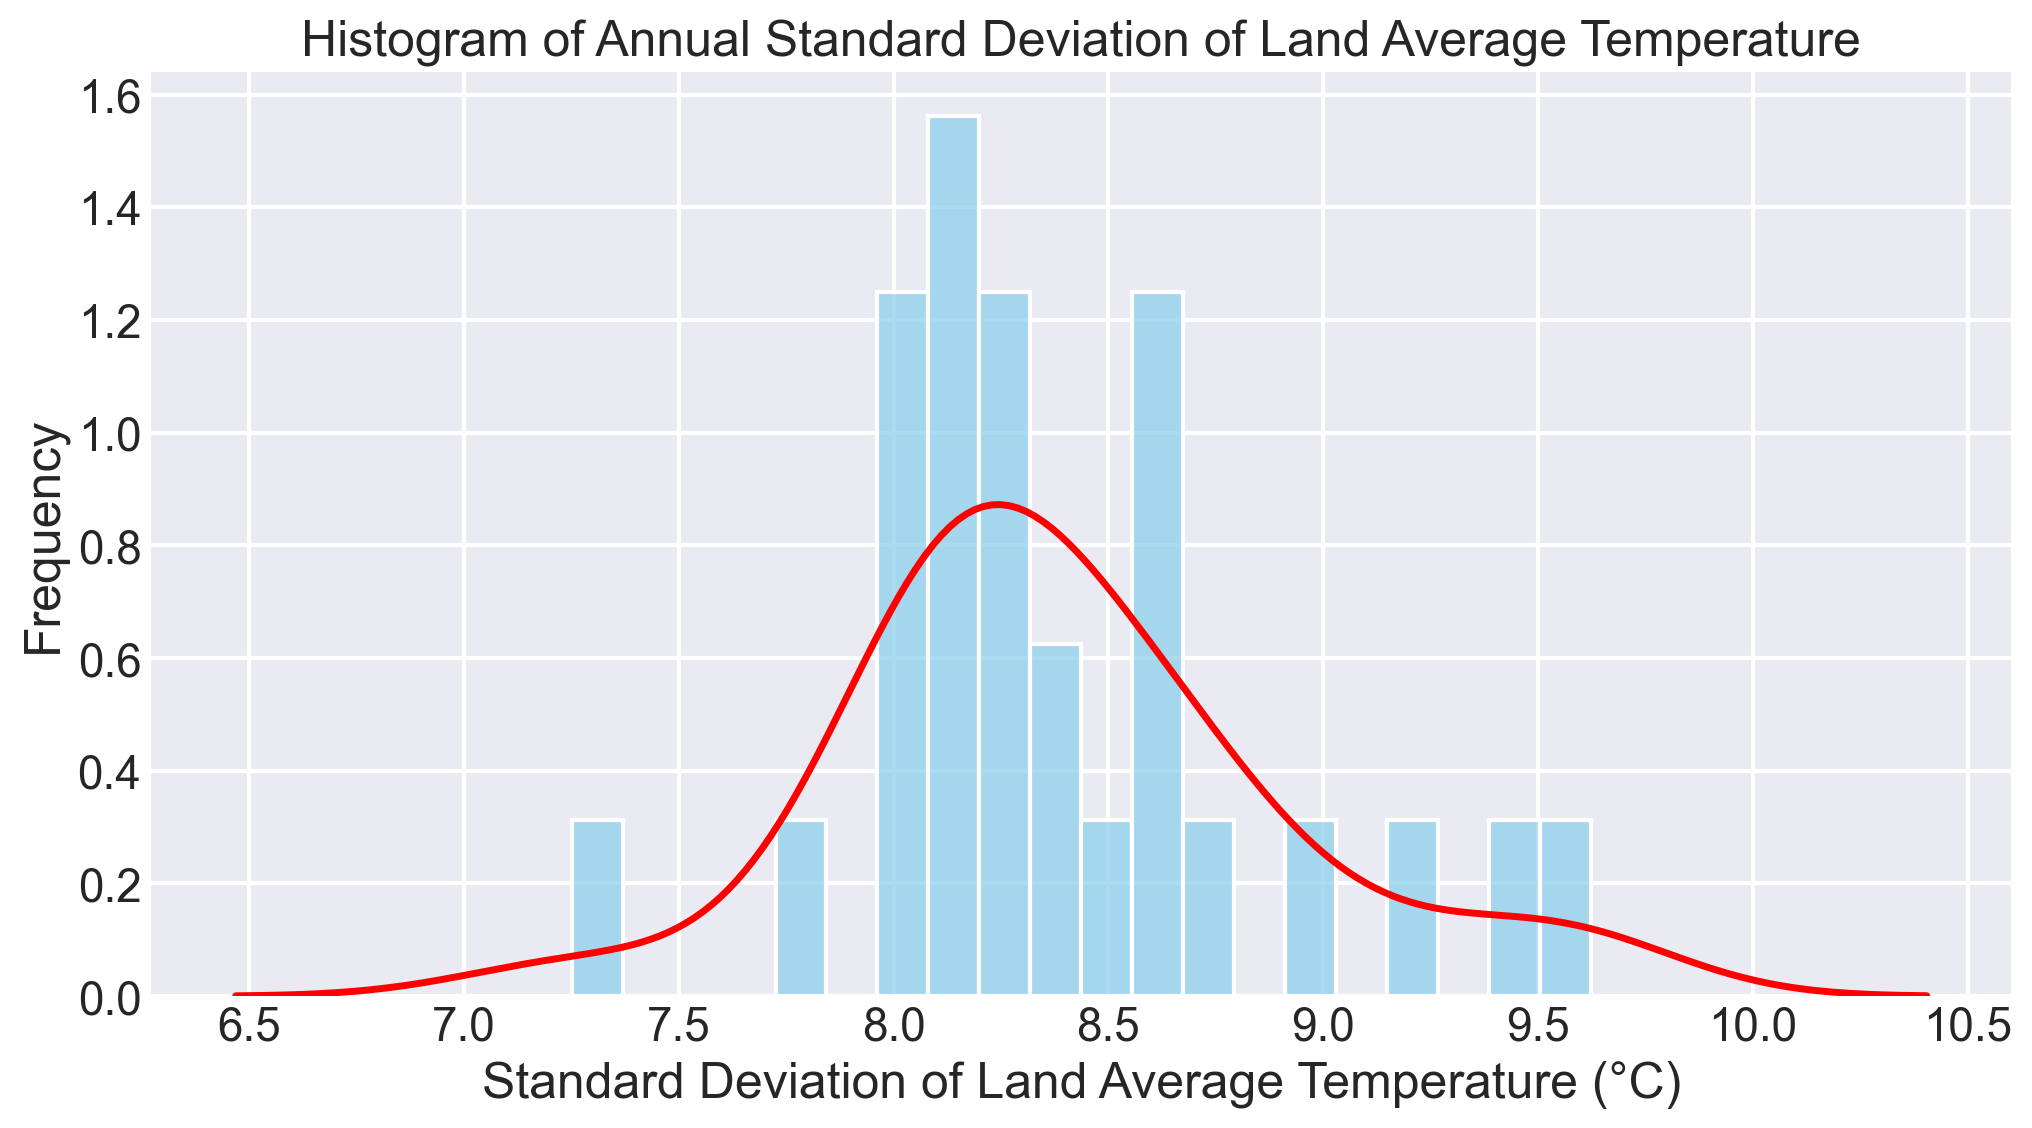

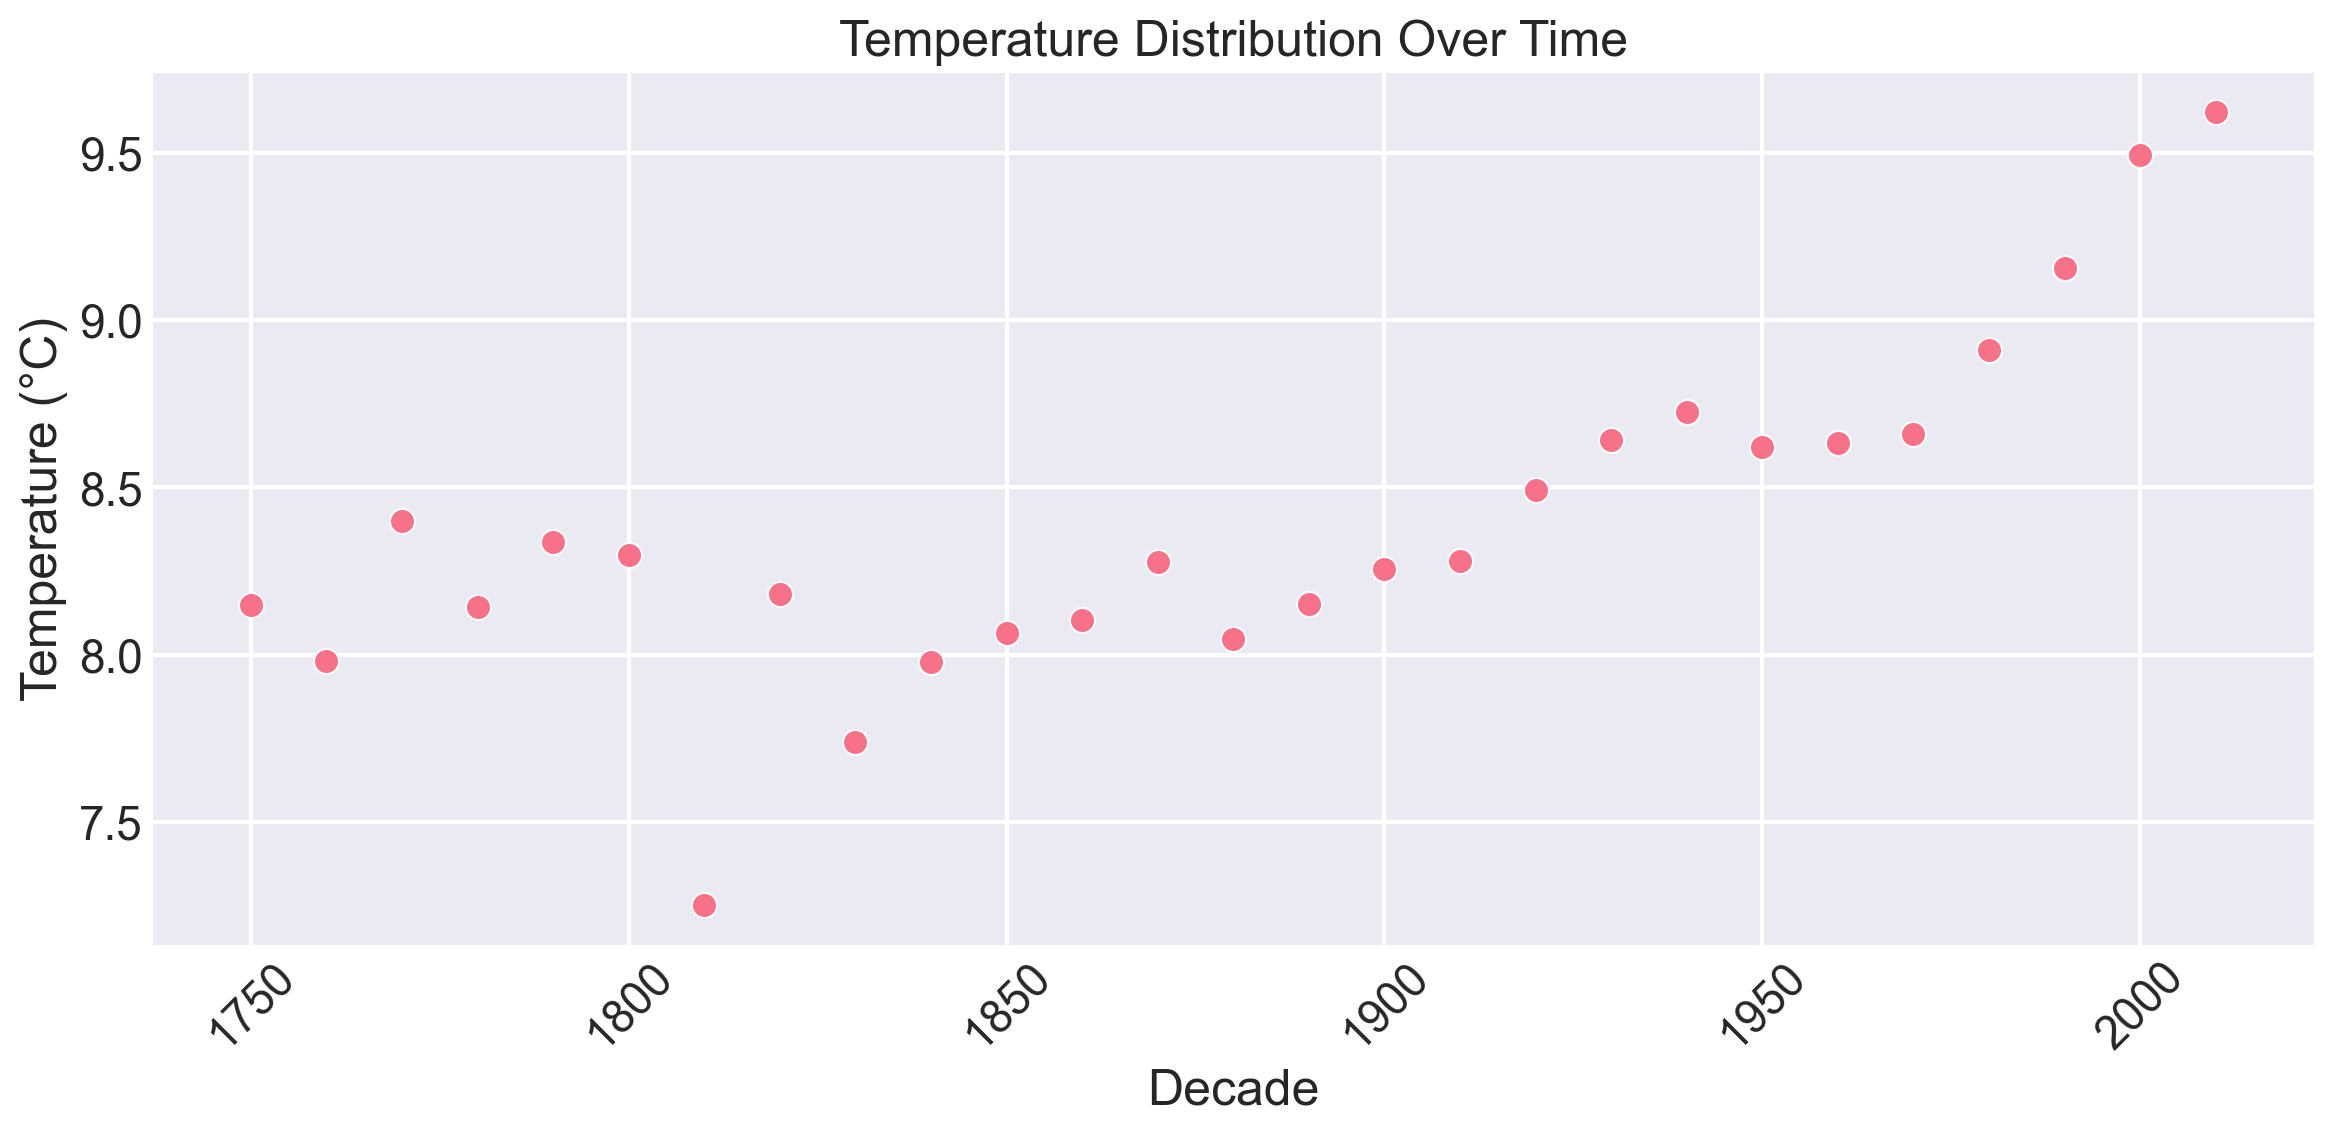

In [653]:
plt.figure(figsize=(12,6))
sns.histplot(data=decade, x='LandAverageTemperature', bins=20, color='skyblue', alpha=0.7, stat='density')
sns.kdeplot(data=decade, x='LandAverageTemperature', color='red', linewidth=2.5)
plt.title('Histogram of Annual Standard Deviation of Land Average Temperature') 
plt.xlabel('Standard Deviation of Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


# Create figure with subplots
fig = plt.figure(figsize=(12, 6))

sns.scatterplot(data=decade,  y='LandAverageTemperature', x='decade')
plt.title('Temperature Distribution Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Decade')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Indicator Analysis
- Annual standard deviation

In [654]:
annual_std = (
    df.groupby('year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .std()
    .reset_index()
)
annual_std.head()

year  LandAverageTemperature  LandAverageTemperatureUncertainty
0  1750                4.850538                           0.647770
1  1751                5.274027                           0.709716
2  1752                2.926488                           0.478218
3  1753                5.511233                           1.147459
4  1754                5.351652                           1.504625

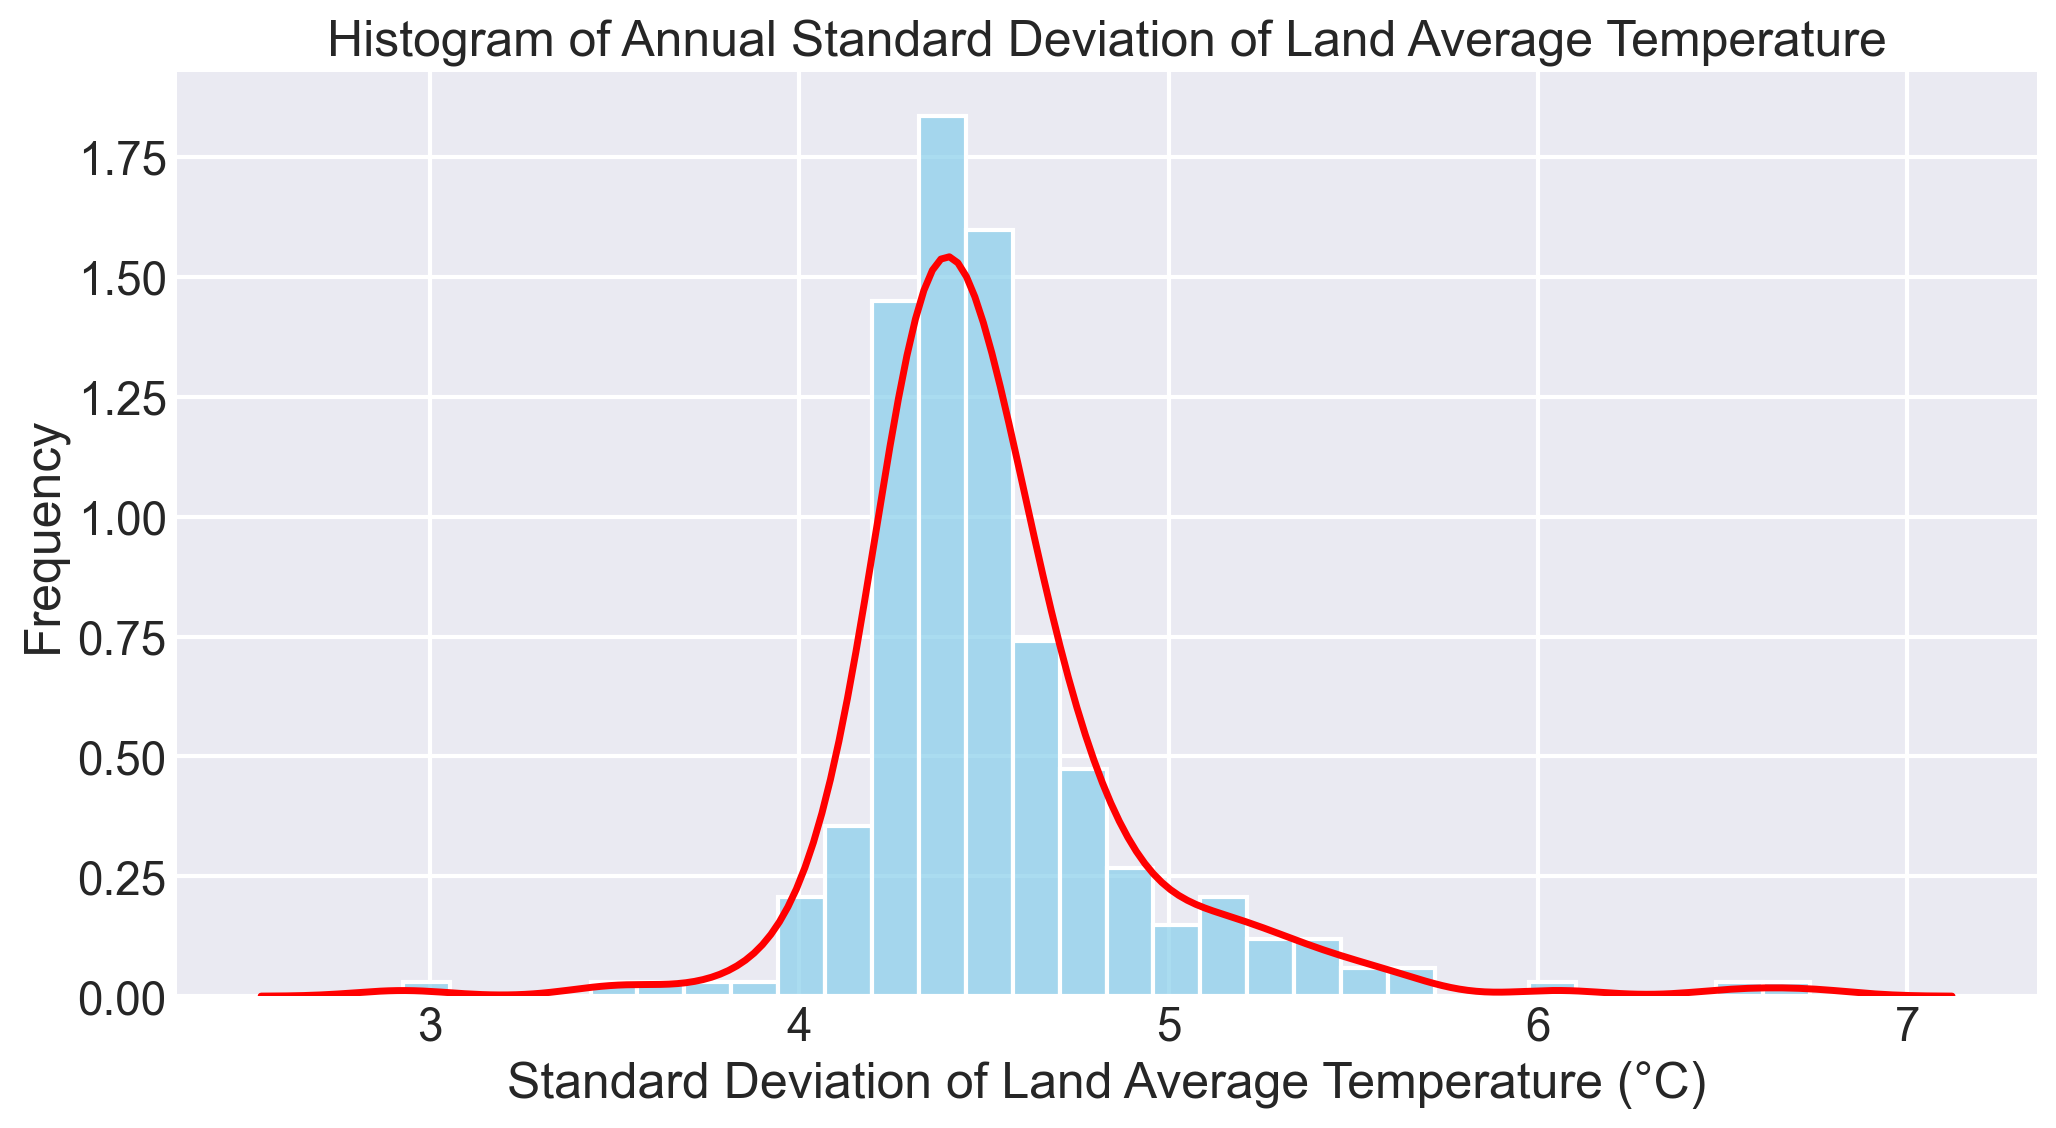

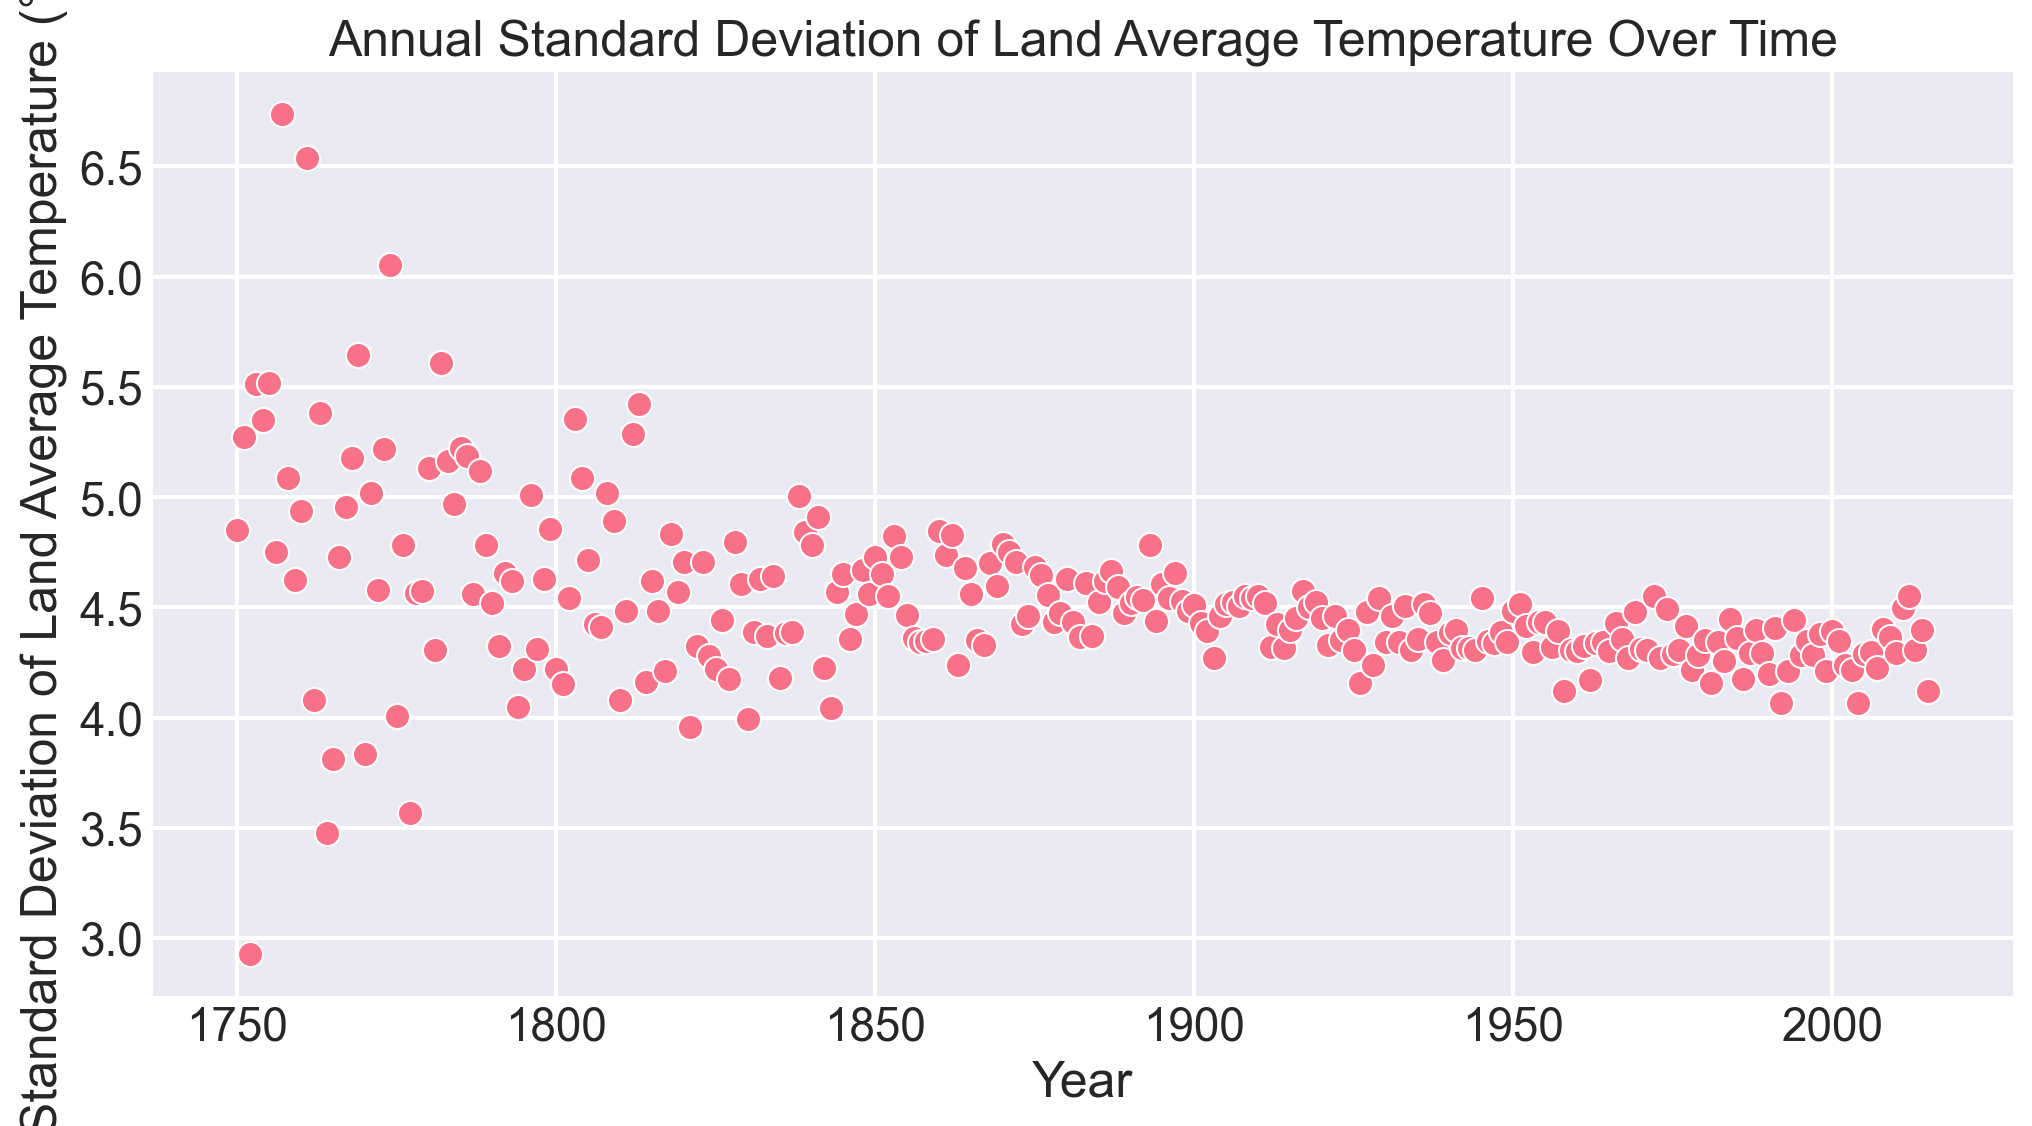

In [655]:
#plot histogram for annual std dev of land average temperature
plt.figure(figsize=(12,6))
sns.histplot(data=annual_std, x='LandAverageTemperature', bins=30, color='skyblue', alpha=0.7, stat='density')
sns.kdeplot(data=annual_std, x='LandAverageTemperature', color='red', linewidth=2.5)
plt.title('Histogram of Annual Standard Deviation of Land Average Temperature') 
plt.xlabel('Standard Deviation of Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


#plot std dev against years
plt.figure(figsize=(12,6))
sns.scatterplot(data=annual_std, x='year', y='LandAverageTemperature') 
plt.title('Annual Standard Deviation of Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Land Average Temperature (°C)')
plt.show()

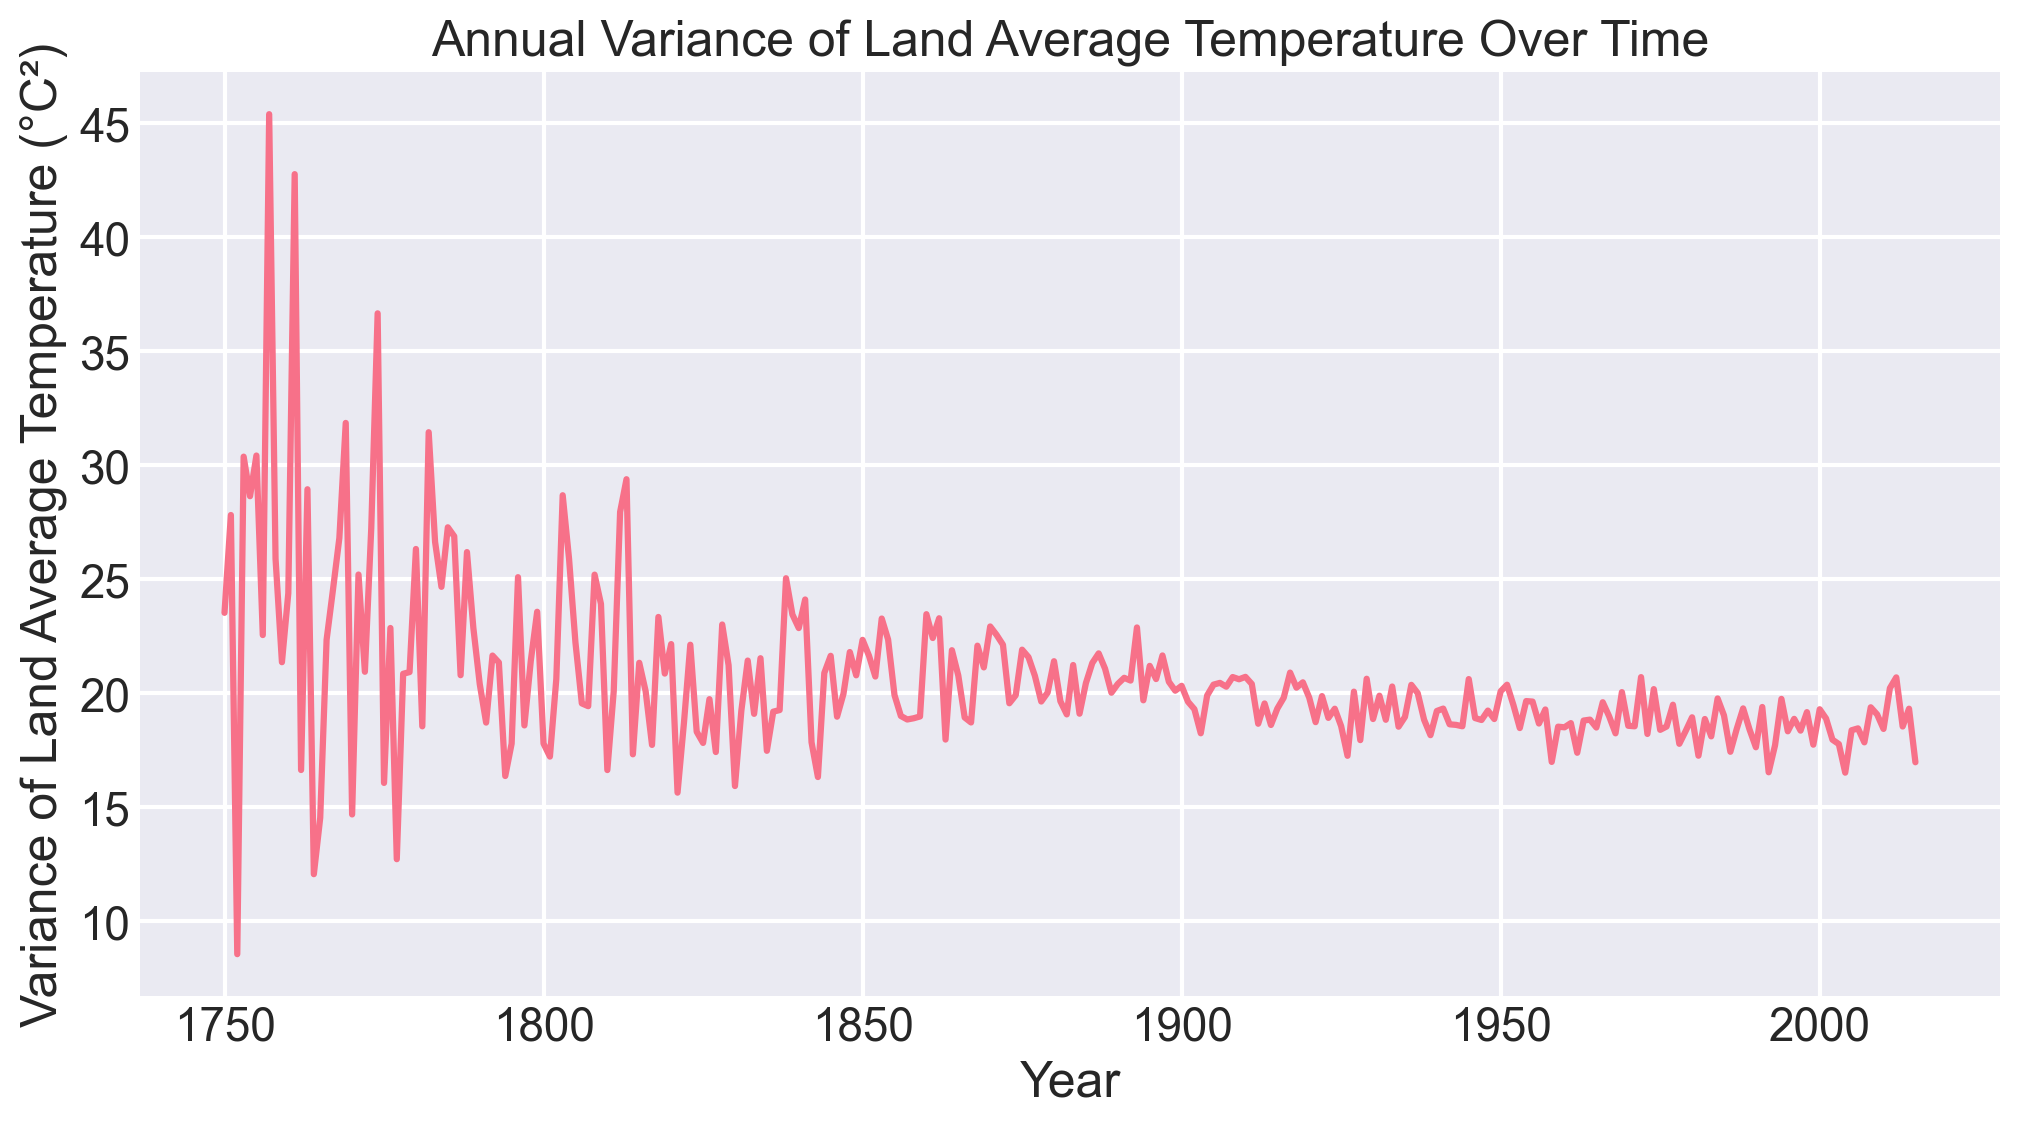

In [656]:
# Annual Variance of Land Average Temperature Over Time
annaual_var = (
    df.groupby('year')['LandAverageTemperature'].var().reset_index()
)   
plt.figure(figsize=(12,6))
sns.lineplot(data=annaual_var, x='year', y='LandAverageTemperature')
plt.title('Annual Variance of Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Variance of Land Average Temperature (°C²)')
plt.show()




## Confidence Intervals
### Annual land average temperature
- Confirm the distribution with a QQ-Plot. Previously, we see a bell-shaped distribution.
- Because the annual standard deviation is unknown, we use the student distribution to compute the 95% confidence interval of the annual mean.

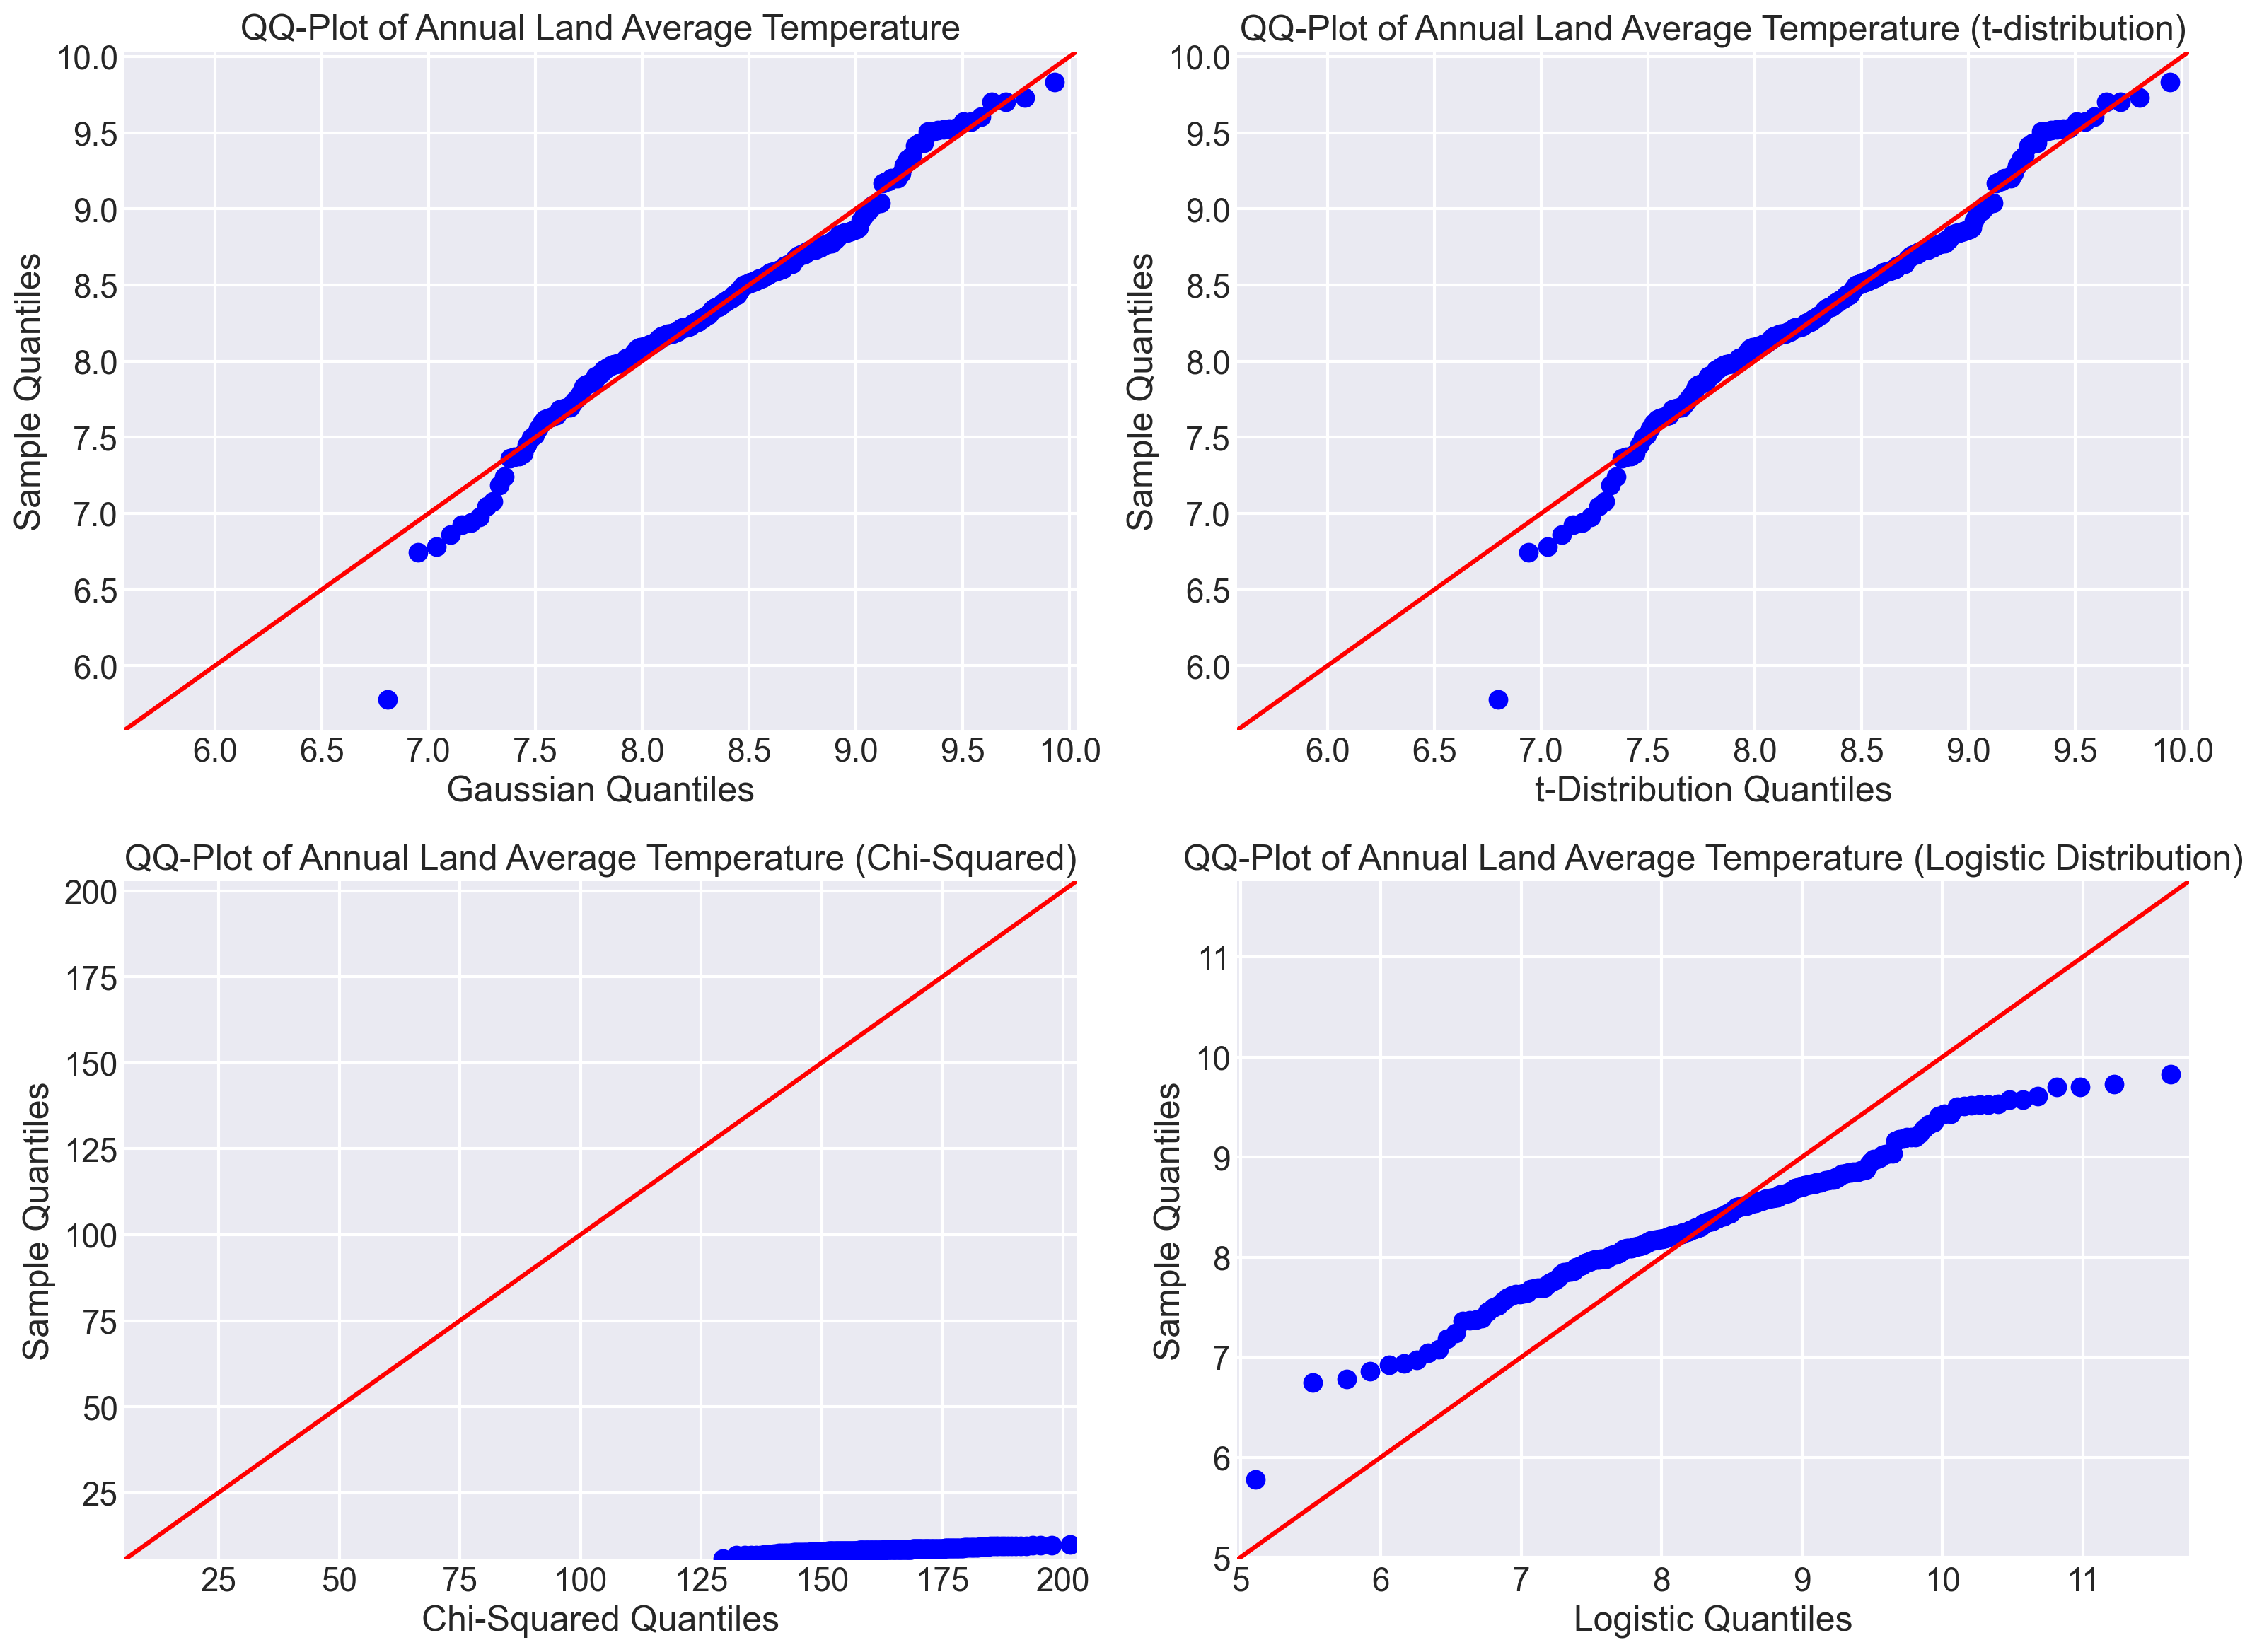

In [657]:
# QQ-plots for Annual Land Average Temperature
n = len(annual['LandAverageTemperature'])
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sm.qqplot(annual['LandAverageTemperature'], dist=stats.norm, loc=np.mean(annual['LandAverageTemperature']), 
          scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[0, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[0, 0].get_lines()[0].set_color('red')  # Reference line
axes[0, 0].set_title('QQ-Plot of Annual Land Average Temperature')
axes[0, 0].set_xlabel('Gaussian Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.t, distargs=(n-1,), loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[0, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[0, 1].get_lines()[0].set_color('red')  # Reference line
axes[0, 1].set_title('QQ-Plot of Annual Land Average Temperature (t-distribution)')
axes[0, 1].set_xlabel('t-Distribution Quantiles')
axes[0, 1].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.chi2, distargs=(n-1,), loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[1, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[1, 0].get_lines()[0].set_color('red')  # Reference line
axes[1, 0].set_title('QQ-Plot of Annual Land Average Temperature (Chi-Squared)')
axes[1, 0].set_xlabel('Chi-Squared Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.logistic, loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[1, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[1, 1].get_lines()[0].set_color('red')  # Reference line
axes[1, 1].set_title('QQ-Plot of Annual Land Average Temperature (Logistic Distribution)')
axes[1, 1].set_xlabel('Logistic Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()



In [658]:
# We use the Student's t-distribution (instead of the normal distribution) because:
# 1. The population standard deviation is UNKNOWN - we only have the sample standard deviation
# 2. We have a finite sample size (n=266 years of annual data)
# 3. The t-distribution accounts for the additional uncertainty from estimating σ from the sample
# 4. From the QQ-plots above, the annual temperatures follow a t-distribution better than other distributions
# 5. This is the standard approach for constructing confidence intervals when σ is unknown

alpha = 0.05
mu_hat = np.mean(annual['LandAverageTemperature'])
sigma_hat = np.std(annual['LandAverageTemperature'], ddof=1)
se_hat = stats.sem(annual['LandAverageTemperature'])

# Critical t-value
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

# Margin of error
a = t_crit*sigma_hat/np.sqrt(n)

# Confidence interval
CI_annual_mean =[mu_hat - a, mu_hat + a]

print(f"95% Confidence Interval for Annual Land Average Temperature Mean: \n({CI_annual_mean[0]:.4f}, {CI_annual_mean[1]:.4f}) °C")
print(f"Sample mean: {mu_hat:.4f} °C (includes in the confidence interval)")

95% Confidence Interval for Annual Land Average Temperature Mean: 
(8.2987, 8.4400) °C
Sample mean: 8.3693 °C (includes in the confidence interval)


### Annual standard deviation temperature
- Associate the distribution with a statistic law. 
    - Plot its histogram : A long rigth tail is observed. The distribution is asymmetric.
    - Plot its qq-plots : None of the classical parametric models (χ², F, lognormal, gamma) provides a perfect fit.
- distribution-free bootstrap procedures to compute confidence intervals for annual indicators and apply Extreme Value Theory (POT / GPD) to model tail behaviour.

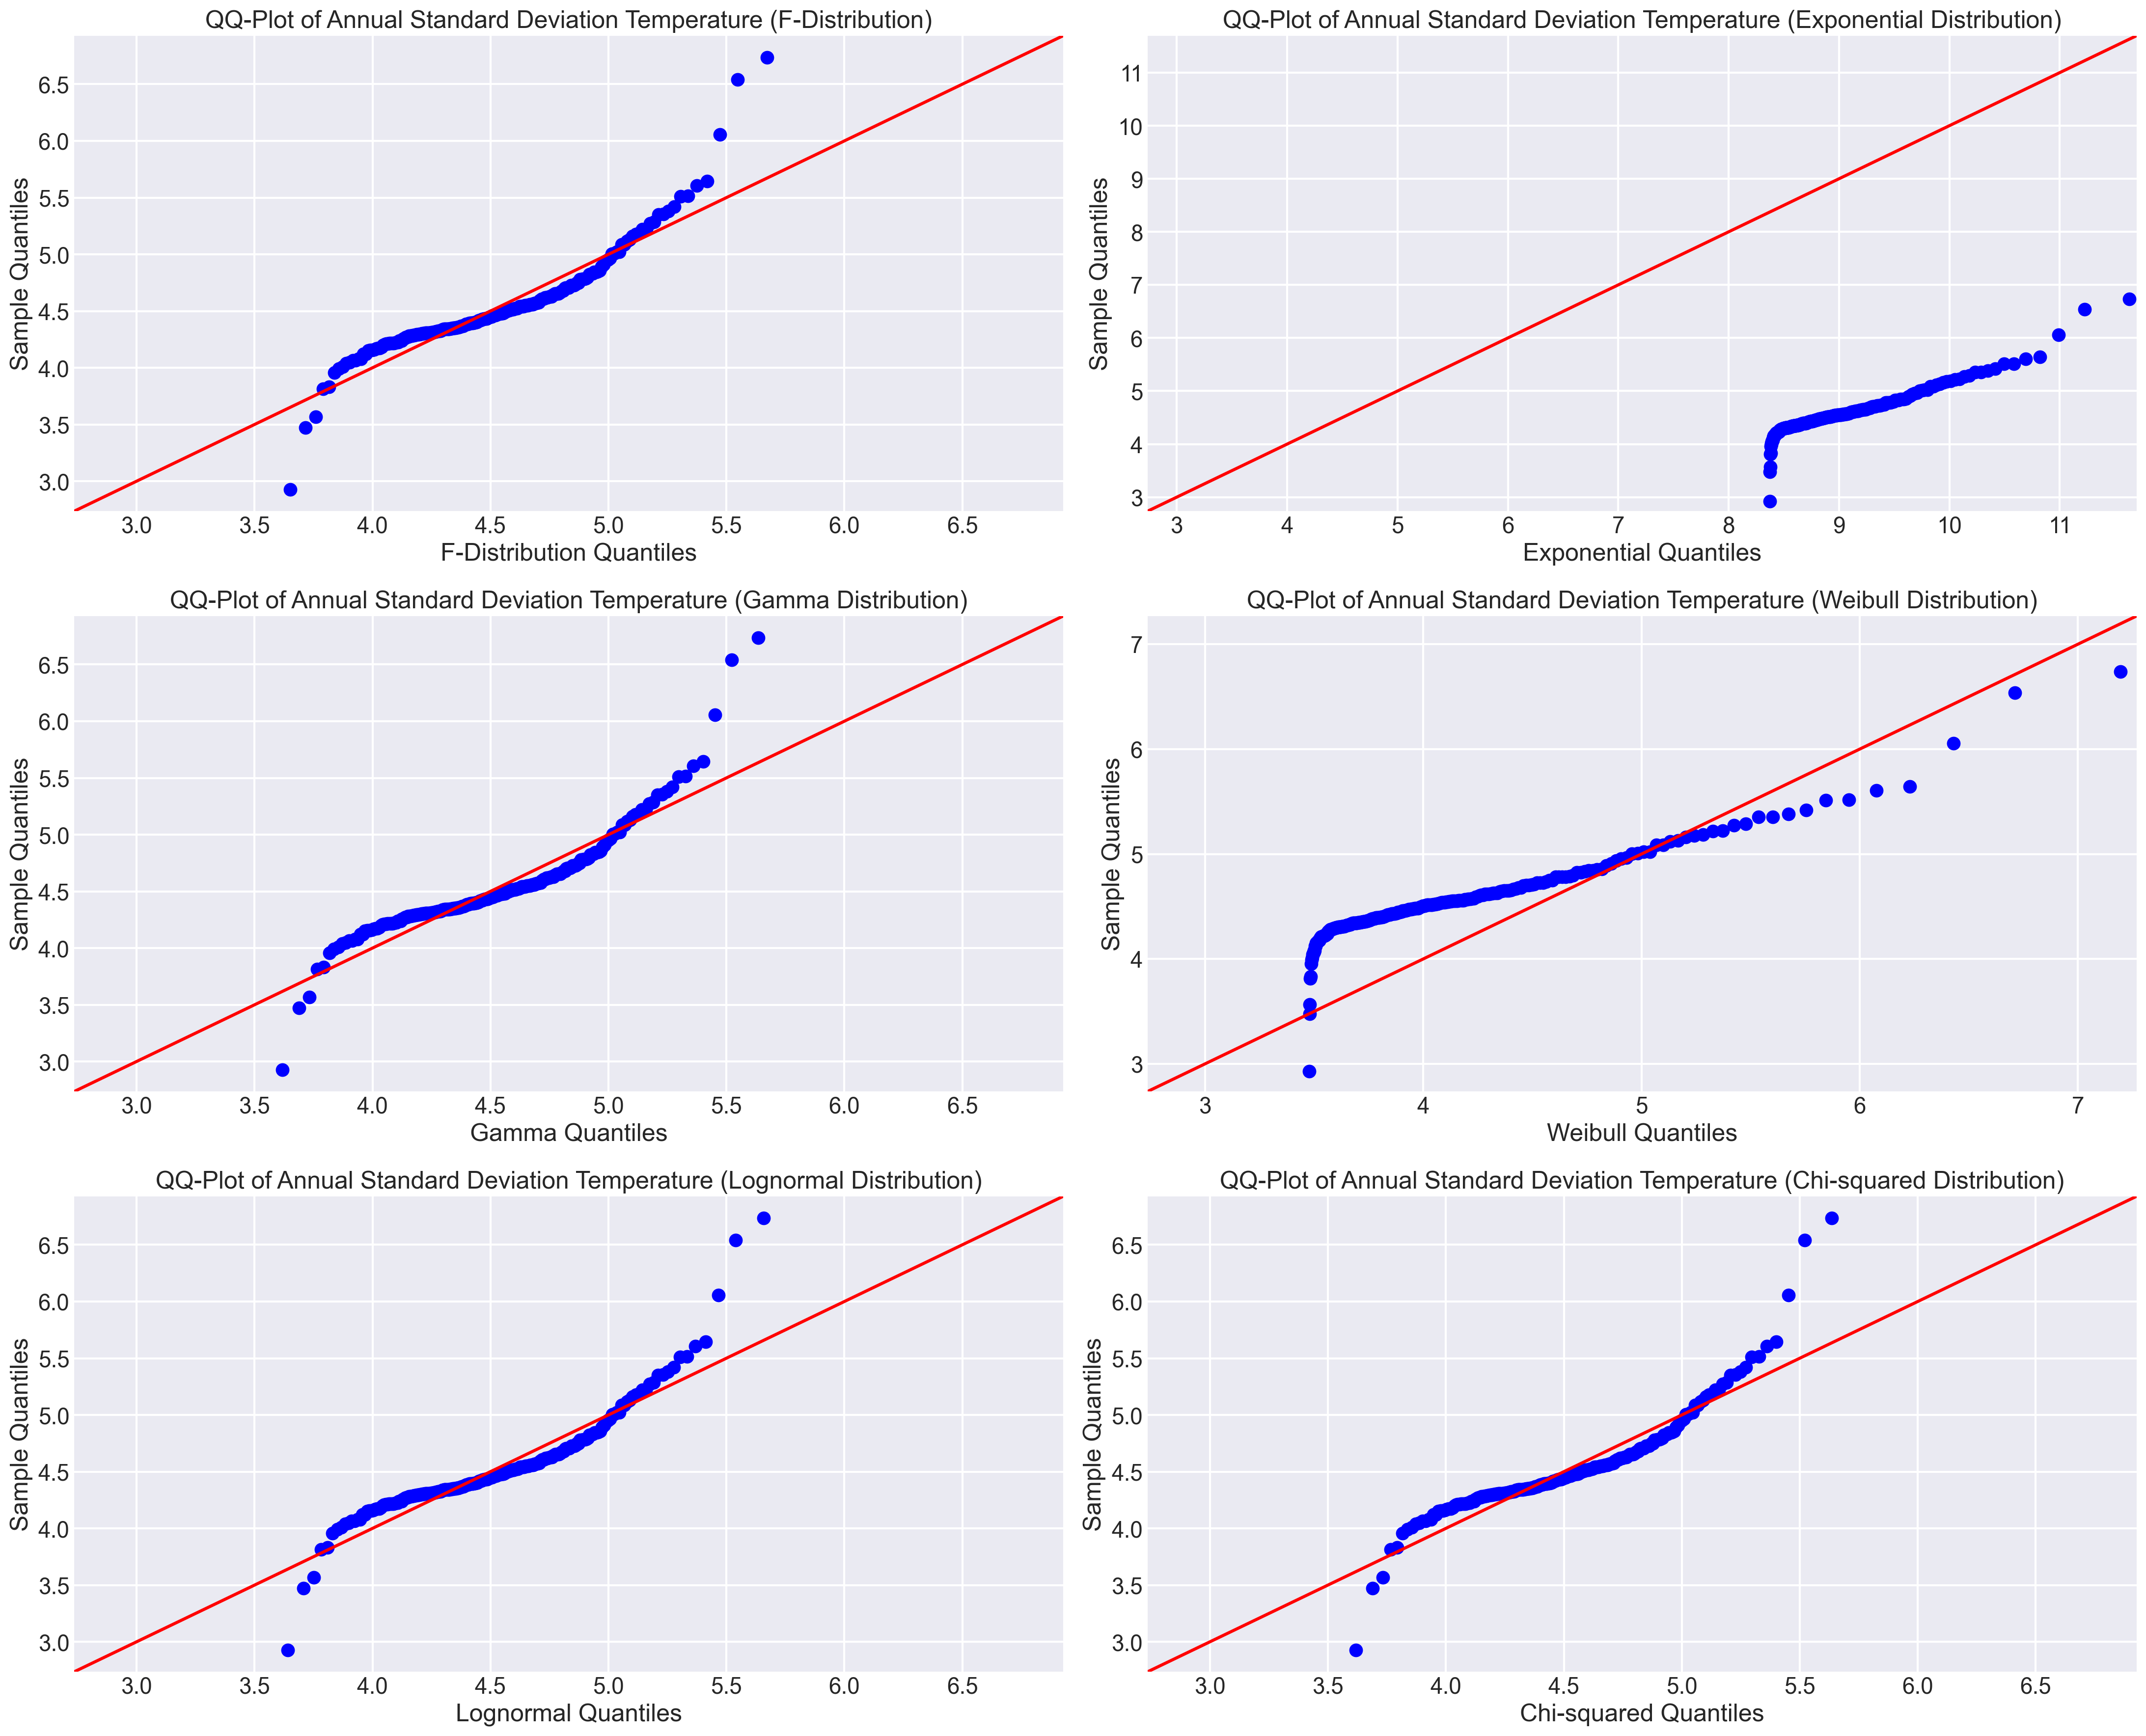

In [659]:
# QQ-plots for Annual Standard Deviation Temperature
n = len(annual_std['LandAverageTemperature'])
fig, axes = plt.subplots(3, 2, figsize=(22, 18))

# Fit MLE parameters for F-distribution
dfn, dfd, loc, scale = stats.f.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.f, distargs=(dfn,dfd,), loc=loc,
            scale=scale, line='45', ax=axes[0, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[0, 0].get_lines()[0].set_color('red')  # Reference line
axes[0, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (F-Distribution)')
axes[0, 0].set_xlabel('F-Distribution Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')


sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.expon, loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line='45', ax=axes[0, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[0, 1].get_lines()[0].set_color('red')  # Reference line
axes[0, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Exponential Distribution)')
axes[0, 1].set_xlabel('Exponential Quantiles')
axes[0, 1].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Gamma distribution
shape, loc, scale = stats.gamma.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.gamma, distargs=(shape,), loc=loc, scale=scale, line='45', ax=axes[1, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[1, 0].get_lines()[0].set_color('red')  # Reference line
axes[1, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (Gamma Distribution)')
axes[1, 0].set_xlabel('Gamma Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Weibull distribution
shape, loc, scale = stats.weibull_min.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.weibull_min, distargs=(shape,), loc=loc, scale=scale, line='45', ax=axes[1, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[1, 1].get_lines()[0].set_color('red')  # Reference line
axes[1, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Weibull Distribution)')
axes[1, 1].set_xlabel('Weibull Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Lognormal distribution
shape, loc, scale = stats.lognorm.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.lognorm, distargs=(shape,), loc=loc, scale=scale, line='45', ax=axes[2, 0], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[2, 0].get_lines()[0].set_color('red')  # Reference line
axes[2, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (Lognormal Distribution)')
axes[2, 0].set_xlabel('Lognormal Quantiles')
axes[2, 0].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Chi-squared distribution
shape, loc, scale = stats.chi2.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.chi2, distargs=(shape,), loc=loc, scale=scale, line='45', ax=axes[2, 1], marker='o', markerfacecolor='blue', markeredgecolor='blue')
axes[2, 1].get_lines()[0].set_color('red')  # Reference line
axes[2, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Chi-squared Distribution)')
axes[2, 1].set_xlabel('Chi-squared Quantiles')
axes[2, 1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

In [660]:
data = annual_std['LandAverageTemperature']

distributions = {
    'F': stats.f,
    'Expon': stats.expon,
    'Gamma': stats.gamma,
    'Weibull_min': stats.weibull_min,
    'Lognorm': stats.lognorm,
    'Chi2': stats.chi2
}

results = []

for name, dist in distributions.items():
    params = dist.fit(data)
    ks_stat, ks_p = stats.kstest(data, name.lower(), args=params)
    
    # Log-likelihood for AIC/BIC
    loglik = np.sum(dist.logpdf(data, *params))
    k = len(params)
    n = len(data)
    aic = 2*k - 2*loglik
    bic = k*np.log(n) - 2*loglik
    
    results.append({
        'Distribution': name,
        'KS Statistic': ks_stat,
        'KS p-value': ks_p,
        'AIC': aic,
        'BIC': bic
    })

df_results = pd.DataFrame(results).sort_values(by='AIC')
print(df_results)

  Distribution  KS Statistic    KS p-value         AIC         BIC
4      Lognorm      0.126916  3.405597e-04  233.981951  244.732440
0            F      0.124692  4.602085e-04  233.992692  248.326677
5         Chi2      0.131806  1.723866e-04  238.415618  249.166107
2        Gamma      0.131806  1.723895e-04  238.415618  249.166107
1        Expon      0.476212  6.105674e-56  783.451450  790.618442
3  Weibull_min      0.608677  4.307054e-95         inf         inf


## Hypothesis Testing: Are there significant changes in temperature over time?

**Null Hypothesis (H₀)**: There is no significant trend in global land temperatures over time (slope = 0)

**Alternative Hypothesis (H₁)**: There is a significant trend in global land temperatures over time (slope ≠ 0)

We'll use multiple statistical tests to evaluate this hypothesis.

### Test 1: Linear Regression Analysis

Testing if there's a statistically significant linear trend in temperature over time.

In [ ]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(annual['year'], 
                                                          annual['LandAverageTemperature'])

print("=" * 70)
print("LINEAR REGRESSION TEST")
print("=" * 70)
print(f"Slope: {slope:.6f} °C/year")
print(f"Intercept: {intercept:.4f} °C")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.2e}")
print(f"Standard error: {std_err:.6f}")
print("=" * 70)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There IS a statistically significant trend in temperature over time.")
    print(f"Temperature is changing at a rate of {slope:.6f} °C/year")
    if slope > 0:
        print(f"The trend is INCREASING (warming)")
    else:
        print(f"The trend is DECREASING (cooling)")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"There is NO statistically significant trend in temperature over time.")

print("=" * 70)

LINEAR REGRESSION TEST
Slope: 0.004732 °C/year
Intercept: -0.5381 °C
R-squared: 0.387303
P-value: 6.47e-30
Standard error: 0.000366
REJECT NULL HYPOTHESIS (p < 0.05)
There IS a statistically significant trend in temperature over time.
Temperature is changing at a rate of 0.004732 °C/year
The trend is INCREASING (warming)


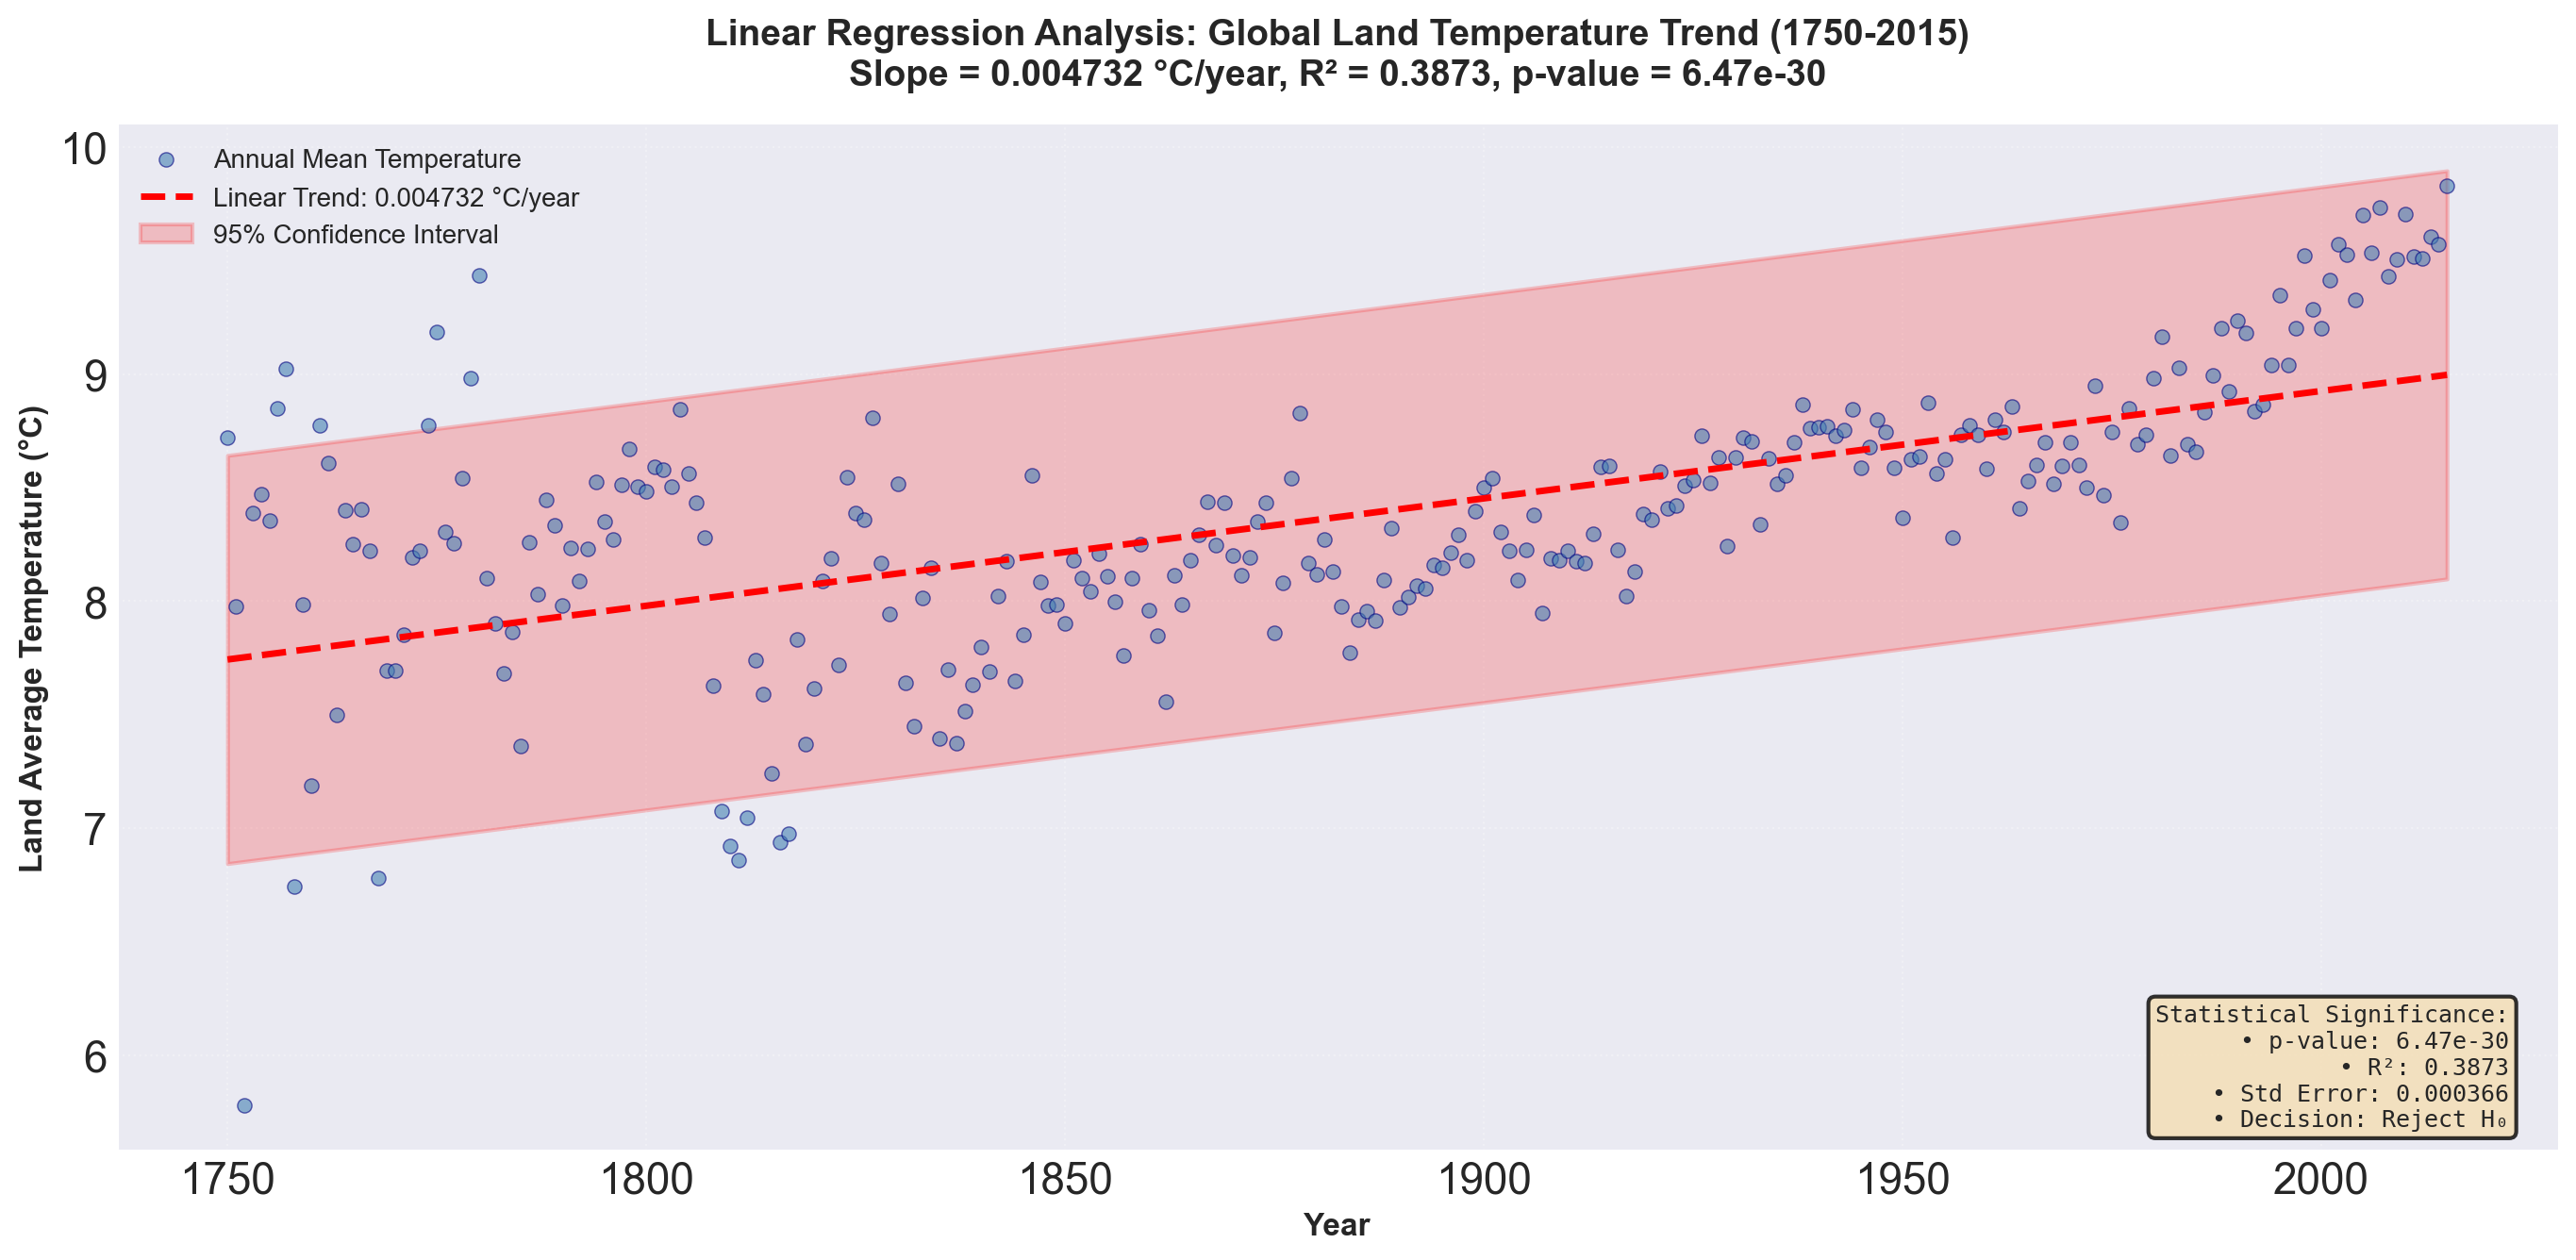

In [662]:
# Visualize the Linear Regression Trend
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data points
ax.scatter(annual['year'], annual['LandAverageTemperature'], 
           alpha=0.6, s=30, color='steelblue', edgecolors='navy', 
           linewidth=0.5, label='Annual Mean Temperature', zorder=3)

# Plot the regression line
regression_line = slope * annual['year'] + intercept
ax.plot(annual['year'], regression_line, 
        color='red', linewidth=2.5, linestyle='--',
        label=f'Linear Trend: {slope:.6f} °C/year', zorder=4)

# Add confidence interval (optional, shows uncertainty in regression)
from scipy import stats as sp_stats
predict_mean_se = np.sqrt(np.sum((annual['LandAverageTemperature'] - regression_line)**2) / (len(annual) - 2))
margin = 1.96 * predict_mean_se  # 95% confidence interval
ax.fill_between(annual['year'], regression_line - margin, regression_line + margin,
                alpha=0.2, color='red', label='95% Confidence Interval', zorder=2)

# Labels and title
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Land Average Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_title(f'Linear Regression Analysis: Global Land Temperature Trend (1750-2015)\n'
             f'Slope = {slope:.6f} °C/year, R² = {r_value**2:.4f}, p-value = {p_value:.2e}',
             fontsize=14, fontweight='bold', pad=15)

# Legend
ax.legend(loc='upper left', fontsize=10, framealpha=0.9, edgecolor='black')

# Grid
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8, zorder=1)

# Add annotation for key statistics (bottom right)
textstr = f'Statistical Significance:\n'
textstr += f'• p-value: {p_value:.2e}\n'
textstr += f'• R²: {r_value**2:.4f}\n'
textstr += f'• Std Error: {std_err:.6f}\n'
textstr += f'• Decision: Reject H₀' if p_value < 0.05 else f'• Decision: Retain H₀'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8, edgecolor='black', linewidth=1.5)
ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='bottom', horizontalalignment='right', bbox=props, family='monospace')

# Formatting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

### Test 2: Mann-Kendall Trend Test

A non-parametric test that doesn't assume linearity. Good for detecting monotonic trends.

MANN–KENDALL TREND TEST
Test statistic (Z): 11.7208
Kendall Tau: 0.4823
P-value: 0.000e+00
Trend: increasing
Sen's slope: 0.005203 °C/year
REJECT NULL HYPOTHESIS (p < 0.05)
There IS a statistically significant monotonic trend.
Trend direction: INCREASING (Sen's slope = 0.0052 °C/year)


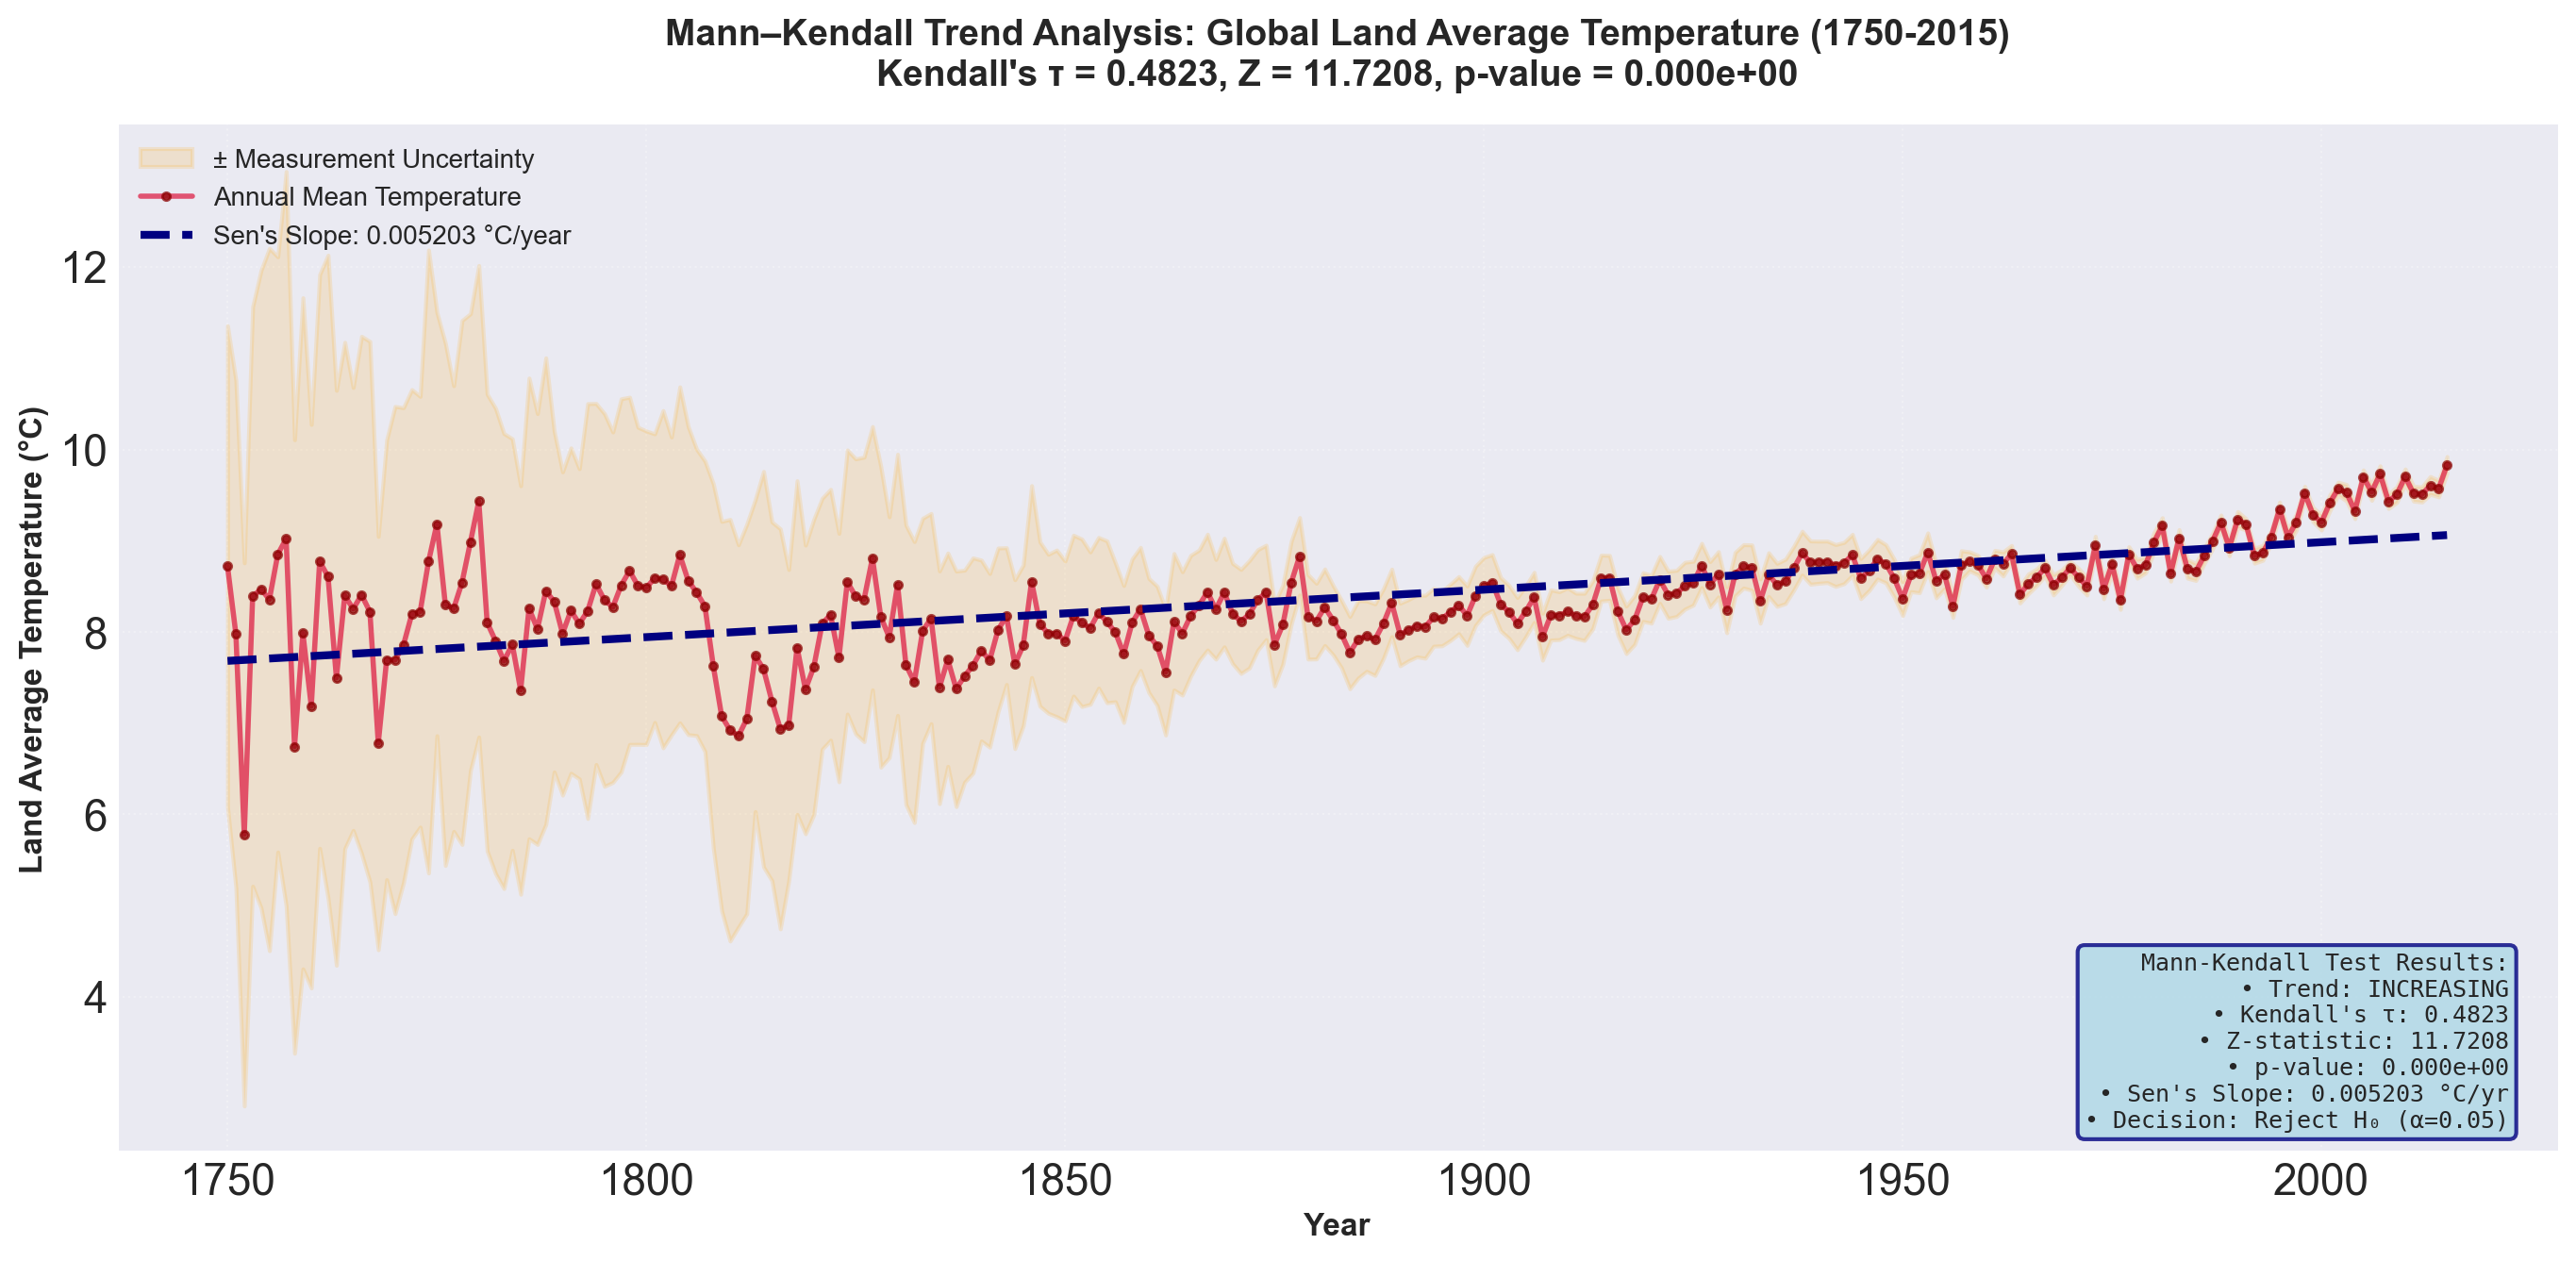

In [ ]:
# Perform Mann-Kendall test
result = mk.original_test(annual['LandAverageTemperature'])
alpha = 0.05  # 5% significance level

print("=" * 70)
print("MANN–KENDALL TREND TEST")
print("=" * 70)
print(f"Test statistic (Z): {result.z:.4f}")
print(f"Kendall Tau: {result.Tau:.4f}")
print(f"P-value: {result.p:.3e}")
print(f"Trend: {result.trend}")
print(f"Sen's slope: {result.slope:.6f} °C/year")
print("=" * 70)

# Interpret results
if result.p < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There IS a statistically significant monotonic trend.")
    print(f"Trend direction: {result.trend.upper()} (Sen's slope = {result.slope:.4f} °C/year)")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p ≥ {alpha})")
    print(f"No statistically significant monotonic trend detected.")
print("=" * 70)

# Professional Visualization
fig, ax = plt.subplots(figsize=(14, 7))

# Calculate Sen's slope line
x = annual['year']
y = annual['LandAverageTemperature']
median_temp = y.median()
sen_line = result.slope * (x - x.median()) + median_temp

# Plot uncertainty band first (background layer)
if 'LandAverageTemperatureUncertainty' in annual.columns:
    ax.fill_between(
        annual['year'],
        annual['LandAverageTemperature'] - annual['LandAverageTemperatureUncertainty'],
        annual['LandAverageTemperature'] + annual['LandAverageTemperatureUncertainty'],
        color='orange', alpha=0.15, label='± Measurement Uncertainty', zorder=1
    )

# Plot temperature data line
ax.plot(
    annual['year'],
    annual['LandAverageTemperature'],
    color='crimson',
    linewidth=2,
    marker='o',
    markersize=3,
    markerfacecolor='darkred',
    markeredgecolor='darkred',
    alpha=0.7,
    label='Annual Mean Temperature',
    zorder=3
)

# Plot Sen's slope trend line
ax.plot(
    x, sen_line,
    color='navy', 
    linestyle='--', 
    linewidth=3,
    label=f"Sen's Slope: {result.slope:.6f} °C/year",
    zorder=4
)

# Labels and title
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Land Average Temperature (°C)', fontsize=12, fontweight='bold')
ax.set_title(f"Mann–Kendall Trend Analysis: Global Land Average Temperature (1750-2015)\n"
             f"Kendall's τ = {result.Tau:.4f}, Z = {result.z:.4f}, p-value = {result.p:.3e}",
             fontsize=14, fontweight='bold', pad=15)

# Legend
ax.legend(loc='upper left', fontsize=10, framealpha=0.9, edgecolor='black')

# Grid
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8, zorder=0)

# Add annotation for key statistics (bottom right)
textstr = f'Mann-Kendall Test Results:\n'
textstr += f'• Trend: {result.trend.upper()}\n'
textstr += f'• Kendall\'s τ: {result.Tau:.4f}\n'
textstr += f'• Z-statistic: {result.z:.4f}\n'
textstr += f'• p-value: {result.p:.3e}\n'
textstr += f'• Sen\'s Slope: {result.slope:.6f} °C/yr\n'
textstr += f'• Decision: {"Reject H₀" if result.p < alpha else "Retain H₀"} (α={alpha})'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8, edgecolor='navy', linewidth=1.5)
ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='bottom', horizontalalignment='right', bbox=props, family='monospace')

# Formatting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

### Test 3: Comparing Early vs Recent Periods (Independent t-test)

Comparing temperatures from the first 50 years vs the last 50 years to test if there's a significant difference.

In [ ]:
# Split data into early and recent periods
min_year = annual['year'].min()
max_year = annual['year'].max()
median_year = math.floor(np.median(annual['year']))

# Early period:
early_period = annual[annual['year'] <= median_year]['LandAverageTemperature']

# Recent period:
recent_period = annual[annual['year'] > median_year]['LandAverageTemperature']

# Perform independent t-test
t_statistic, t_pvalue = stats.ttest_ind(early_period, recent_period)

print("=" * 70)
print("INDEPENDENT T-TEST (Early vs Recent Periods)")
print("=" * 70)
print(f"Early period: {min_year} - {median_year}")
print(f"Mean temperature: {early_period.mean():.4f} °C")
print(f"Std deviation: {early_period.std():.4f} °C")
print(f"Number of observations: {len(early_period)}")
print()
print(f"Recent period: {median_year + 1} - {max_year}")
print(f"Mean temperature: {recent_period.mean():.4f} °C")
print(f"Std deviation: {recent_period.std():.4f} °C")
print(f"Number of observations: {len(recent_period)}")
print()
print(f"Temperature difference: {recent_period.mean() - early_period.mean():.4f} °C")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {t_pvalue:.2e}")
print("=" * 70)

# Interpretation
if t_pvalue < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There IS a statistically significant difference between early and recent periods.")
    if recent_period.mean() > early_period.mean():
        print(f"Recent temperatures are significantly HIGHER than early temperatures.")
    else:
        print(f"Recent temperatures are significantly LOWER than early temperatures.")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"There is NO statistically significant difference between periods.")

print("=" * 70)

INDEPENDENT T-TEST (Early vs Recent Periods)
Early period: 1750 - 1882
Mean temperature: 8.0627 °C
Std deviation: 0.5347 °C
Number of observations: 133

Recent period: 1883 - 2015
Mean temperature: 8.6759 °C
Std deviation: 0.4599 °C
Number of observations: 133

Temperature difference: 0.6132 °C
T-statistic: -10.0263
P-value: 2.95e-20
REJECT NULL HYPOTHESIS (p < 0.05)
There IS a statistically significant difference between early and recent periods.
Recent temperatures are significantly HIGHER than early temperatures.


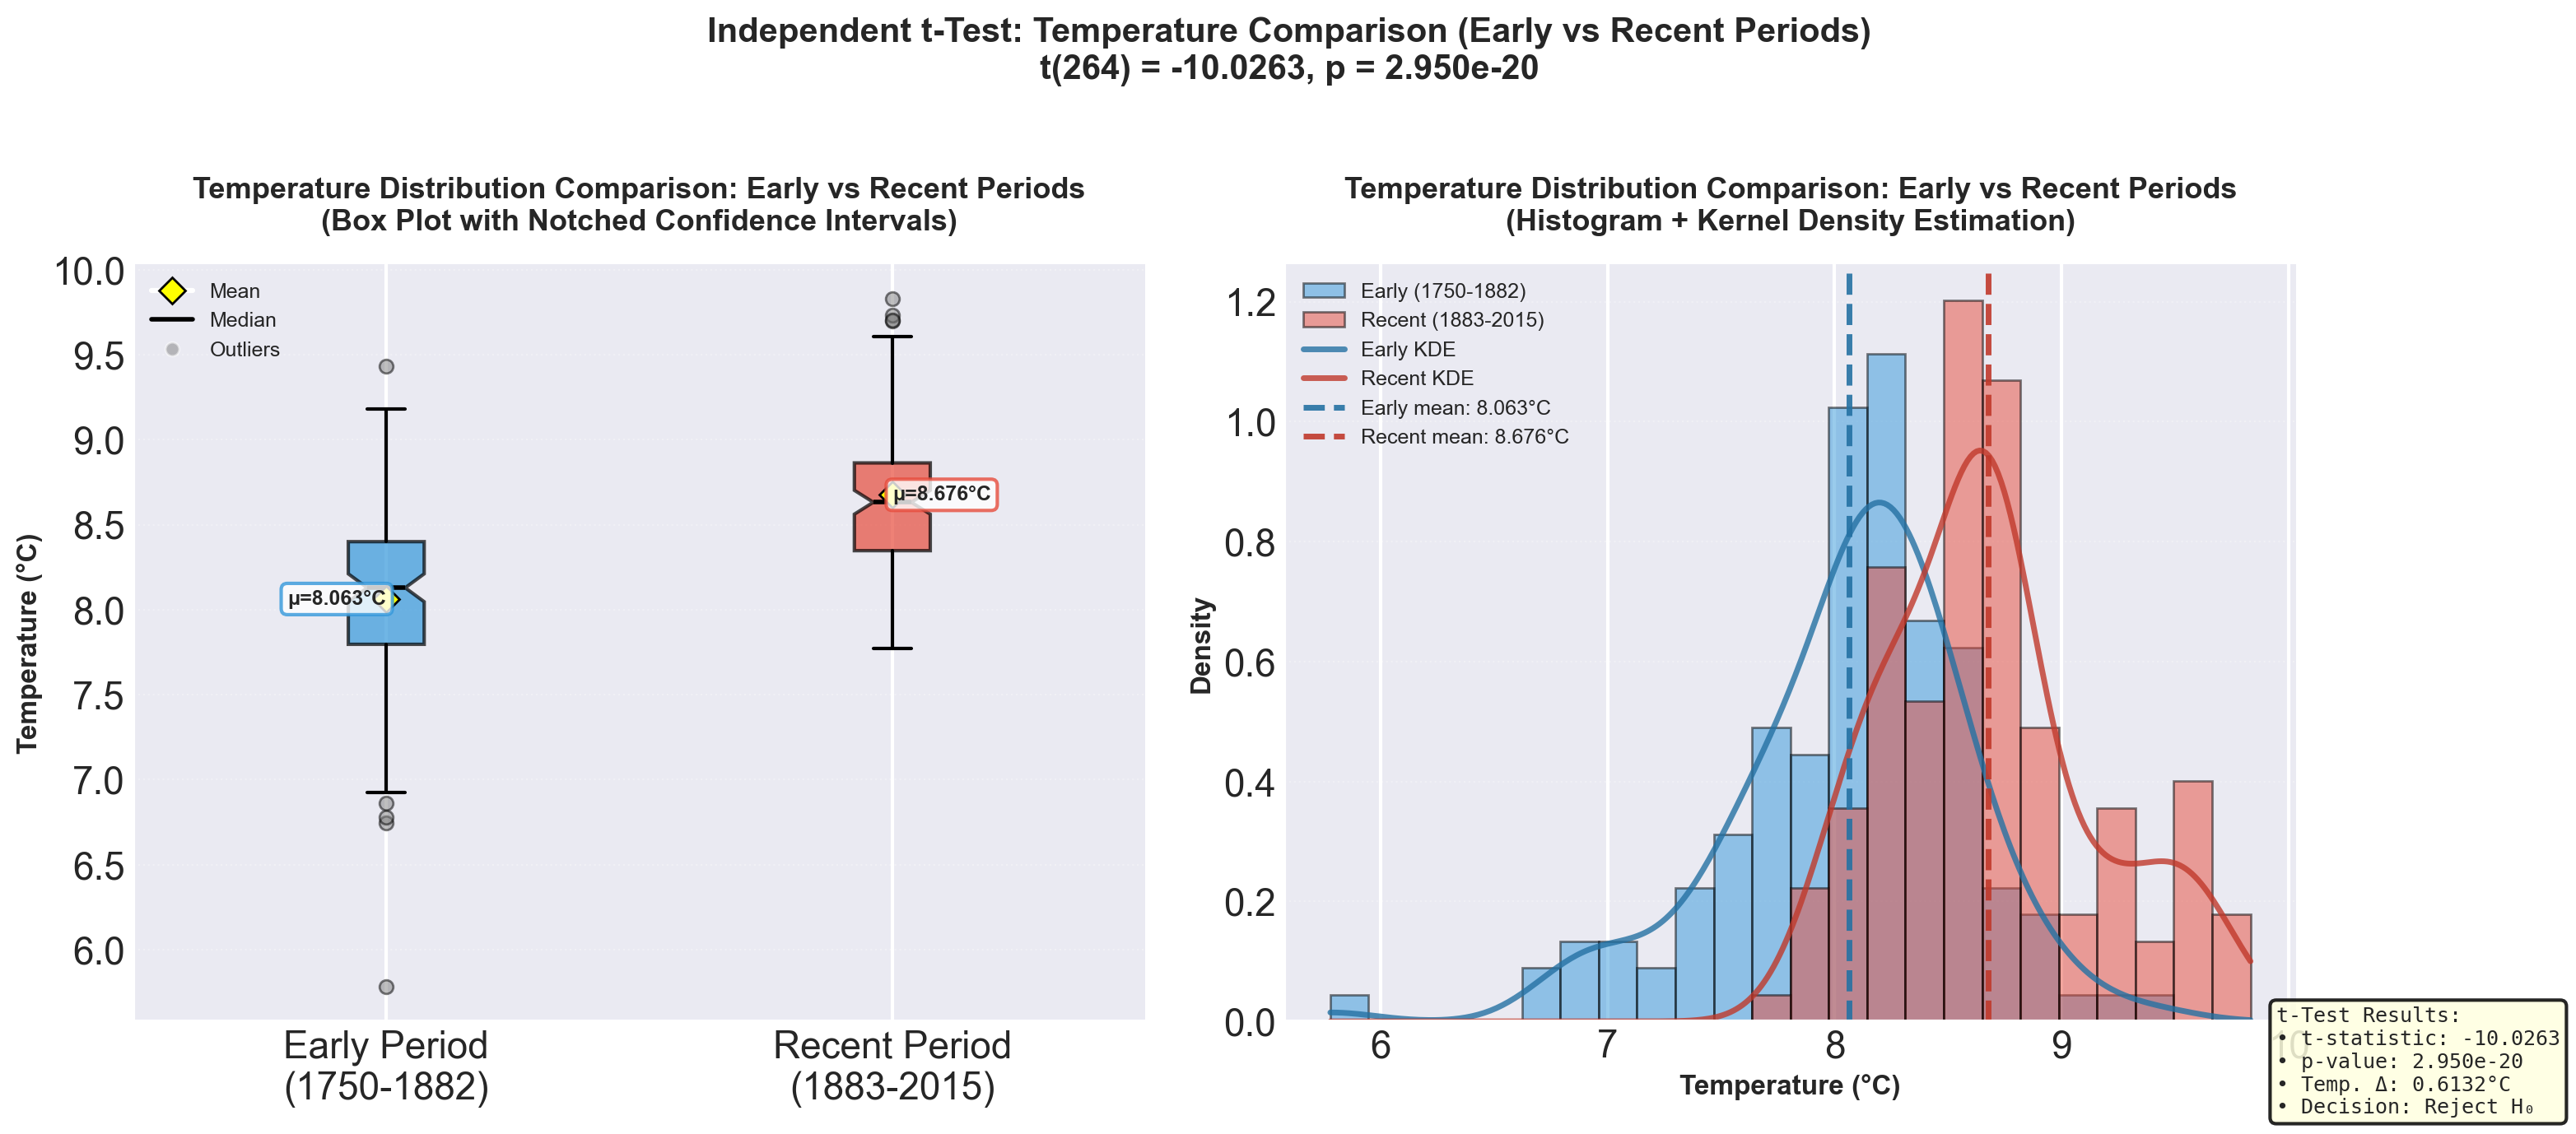

In [675]:
# Early vs Recent Period Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Define colors for consistency
colors = ['#3498db', '#e74c3c']  # Blue for Early, Red for Recent
colors_dark = ['#2471a3', '#c0392b']  # Darker versions for accents

# ========== Left Plot: Box Plot Comparison ==========
ax1 = axes[0]

# Create box plot with enhanced styling
bp = ax1.boxplot([early_period, recent_period], 
                 labels=[f'Early Period\n({min_year}-{median_year})', 
                        f'Recent Period\n({median_year + 1}-{max_year})'],
                 patch_artist=True,
                 notch=True,  # Add notches for median confidence intervals
                 showmeans=True,  # Show mean as well as median
                 meanprops=dict(marker='D', markerfacecolor='yellow', markeredgecolor='black', markersize=8),
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(linewidth=1.5),
                 capprops=dict(linewidth=1.5),
                 flierprops=dict(marker='o', markerfacecolor='gray', markersize=6, alpha=0.5))

# Apply colors to box plots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Labels and title
ax1.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax1.set_title('Temperature Distribution Comparison: Early vs Recent Periods\n(Box Plot with Notched Confidence Intervals)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle=':', linewidth=0.8, axis='y')

# Add statistical annotations on the plot
ax1.text(1, early_period.mean(), f'μ={early_period.mean():.3f}°C', 
         ha='right', va='center', fontsize=9, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=colors[0], alpha=0.8))
ax1.text(2, recent_period.mean(), f'μ={recent_period.mean():.3f}°C', 
         ha='left', va='center', fontsize=9, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=colors[1], alpha=0.8))

# Add legend for symbols
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='D', color='w', markerfacecolor='yellow', 
           markeredgecolor='black', markersize=8, label='Mean'),
    Line2D([0], [0], color='black', linewidth=2, label='Median'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
           markersize=6, alpha=0.5, linestyle='None', label='Outliers')
]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=9, framealpha=0.9, edgecolor='black')

# Formatting
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# ========== Right Plot: Histogram + KDE Comparison ==========
ax2 = axes[1]

# Create histograms
bins = np.linspace(min(early_period.min(), recent_period.min()),
                   max(early_period.max(), recent_period.max()), 25)

ax2.hist(early_period, bins=bins, alpha=0.5, 
         label=f'Early ({min_year}-{median_year})', 
         color=colors[0], density=True, edgecolor='black', linewidth=1)
ax2.hist(recent_period, bins=bins, alpha=0.5, 
         label=f'Recent ({median_year + 1}-{max_year})', 
         color=colors[1], density=True, edgecolor='black', linewidth=1)

# Add KDE curves
from scipy.stats import gaussian_kde
kde_early = gaussian_kde(early_period)
kde_recent = gaussian_kde(recent_period)
x_range = np.linspace(min(early_period.min(), recent_period.min()),
                      max(early_period.max(), recent_period.max()), 300)

ax2.plot(x_range, kde_early(x_range), color=colors_dark[0], 
         linewidth=2.5, linestyle='-', label='Early KDE', alpha=0.8)
ax2.plot(x_range, kde_recent(x_range), color=colors_dark[1], 
         linewidth=2.5, linestyle='-', label='Recent KDE', alpha=0.8)

# Add mean lines
ax2.axvline(early_period.mean(), color=colors_dark[0], linestyle='--', linewidth=2.5, 
            label=f'Early mean: {early_period.mean():.3f}°C', alpha=0.9)
ax2.axvline(recent_period.mean(), color=colors_dark[1], linestyle='--', linewidth=2.5, 
            label=f'Recent mean: {recent_period.mean():.3f}°C', alpha=0.9)

# Labels and title
ax2.set_xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Density', fontsize=12, fontweight='bold')
ax2.set_title('Temperature Distribution Comparison: Early vs Recent Periods\n(Histogram + Kernel Density Estimation)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='upper left', fontsize=9, framealpha=0.9, edgecolor='black')
ax2.grid(True, alpha=0.3, linestyle=':', linewidth=0.8, axis='y')

# Formatting
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

# Add statistical summary box (bottom right)
textstr = f't-Test Results:\n'
textstr += f'• t-statistic: {t_statistic:.4f}\n'
textstr += f'• p-value: {t_pvalue:.3e}\n'
textstr += f'• Temp. Δ: {recent_period.mean() - early_period.mean():.4f}°C\n'
textstr += f'• Decision: {"Reject H₀" if t_pvalue < alpha else "Retain H₀"}'
props = dict(boxstyle='round', facecolor='lightyellow', alpha=0.85, edgecolor='black', linewidth=1.5)
ax2.text(0.98, 0.02, textstr, transform=ax2.transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='left', 
         bbox=props, family='monospace')

# Overall title
fig.suptitle(f'Independent t-Test: Temperature Comparison (Early vs Recent Periods)\n'
             f't({len(early_period) + len(recent_period) - 2}) = {t_statistic:.4f}, p = {t_pvalue:.3e}',
             fontsize=15, fontweight='bold', y=1.00)

plt.tight_layout()
plt.show()

### Test 4: Analysis by Decade

Examining temperature changes across each decade using ANOVA to test if there are significant differences.

In [ ]:
# Split data into early and recent periods
min_year = annual['year'].min()
max_year = annual['year'].max()
median_year = math.floor(np.median(annual['year']))

# Early period:
early_period = annual[annual['year'] <= median_year]['LandAverageTemperature']

# Recent period:
recent_period = annual[annual['year'] > median_year]['LandAverageTemperature']

print("=" * 70)

# Perform one-way ANOVA
f_statistic, anova_pvalue = stats.f_oneway(early_period, recent_period)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"P-value: {anova_pvalue:.2e}")
print("=" * 70)

if anova_pvalue < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There ARE statistically significant differences in temperature across decades.")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"There are NO statistically significant differences across decades.")

print("=" * 70)

ANOVA F-statistic: 100.5264
P-value: 2.95e-20
REJECT NULL HYPOTHESIS (p < 0.05)
There ARE statistically significant differences in temperature across decades.


ANOVA TEST SUMMARY
F-statistic:        F(1, 264) = 100.5264
P-value:            2.949555e-20
Significance level: α = 0.05

Early Period:  1750-1882  (n=133, μ=8.0627°C)
Recent Period: 1883-2015 (n=133, μ=8.6759°C)
Temperature Difference: 0.6132°C

REJECT NULL HYPOTHESIS (p < 0.05)
There ARE statistically significant differences in temperature across decades.


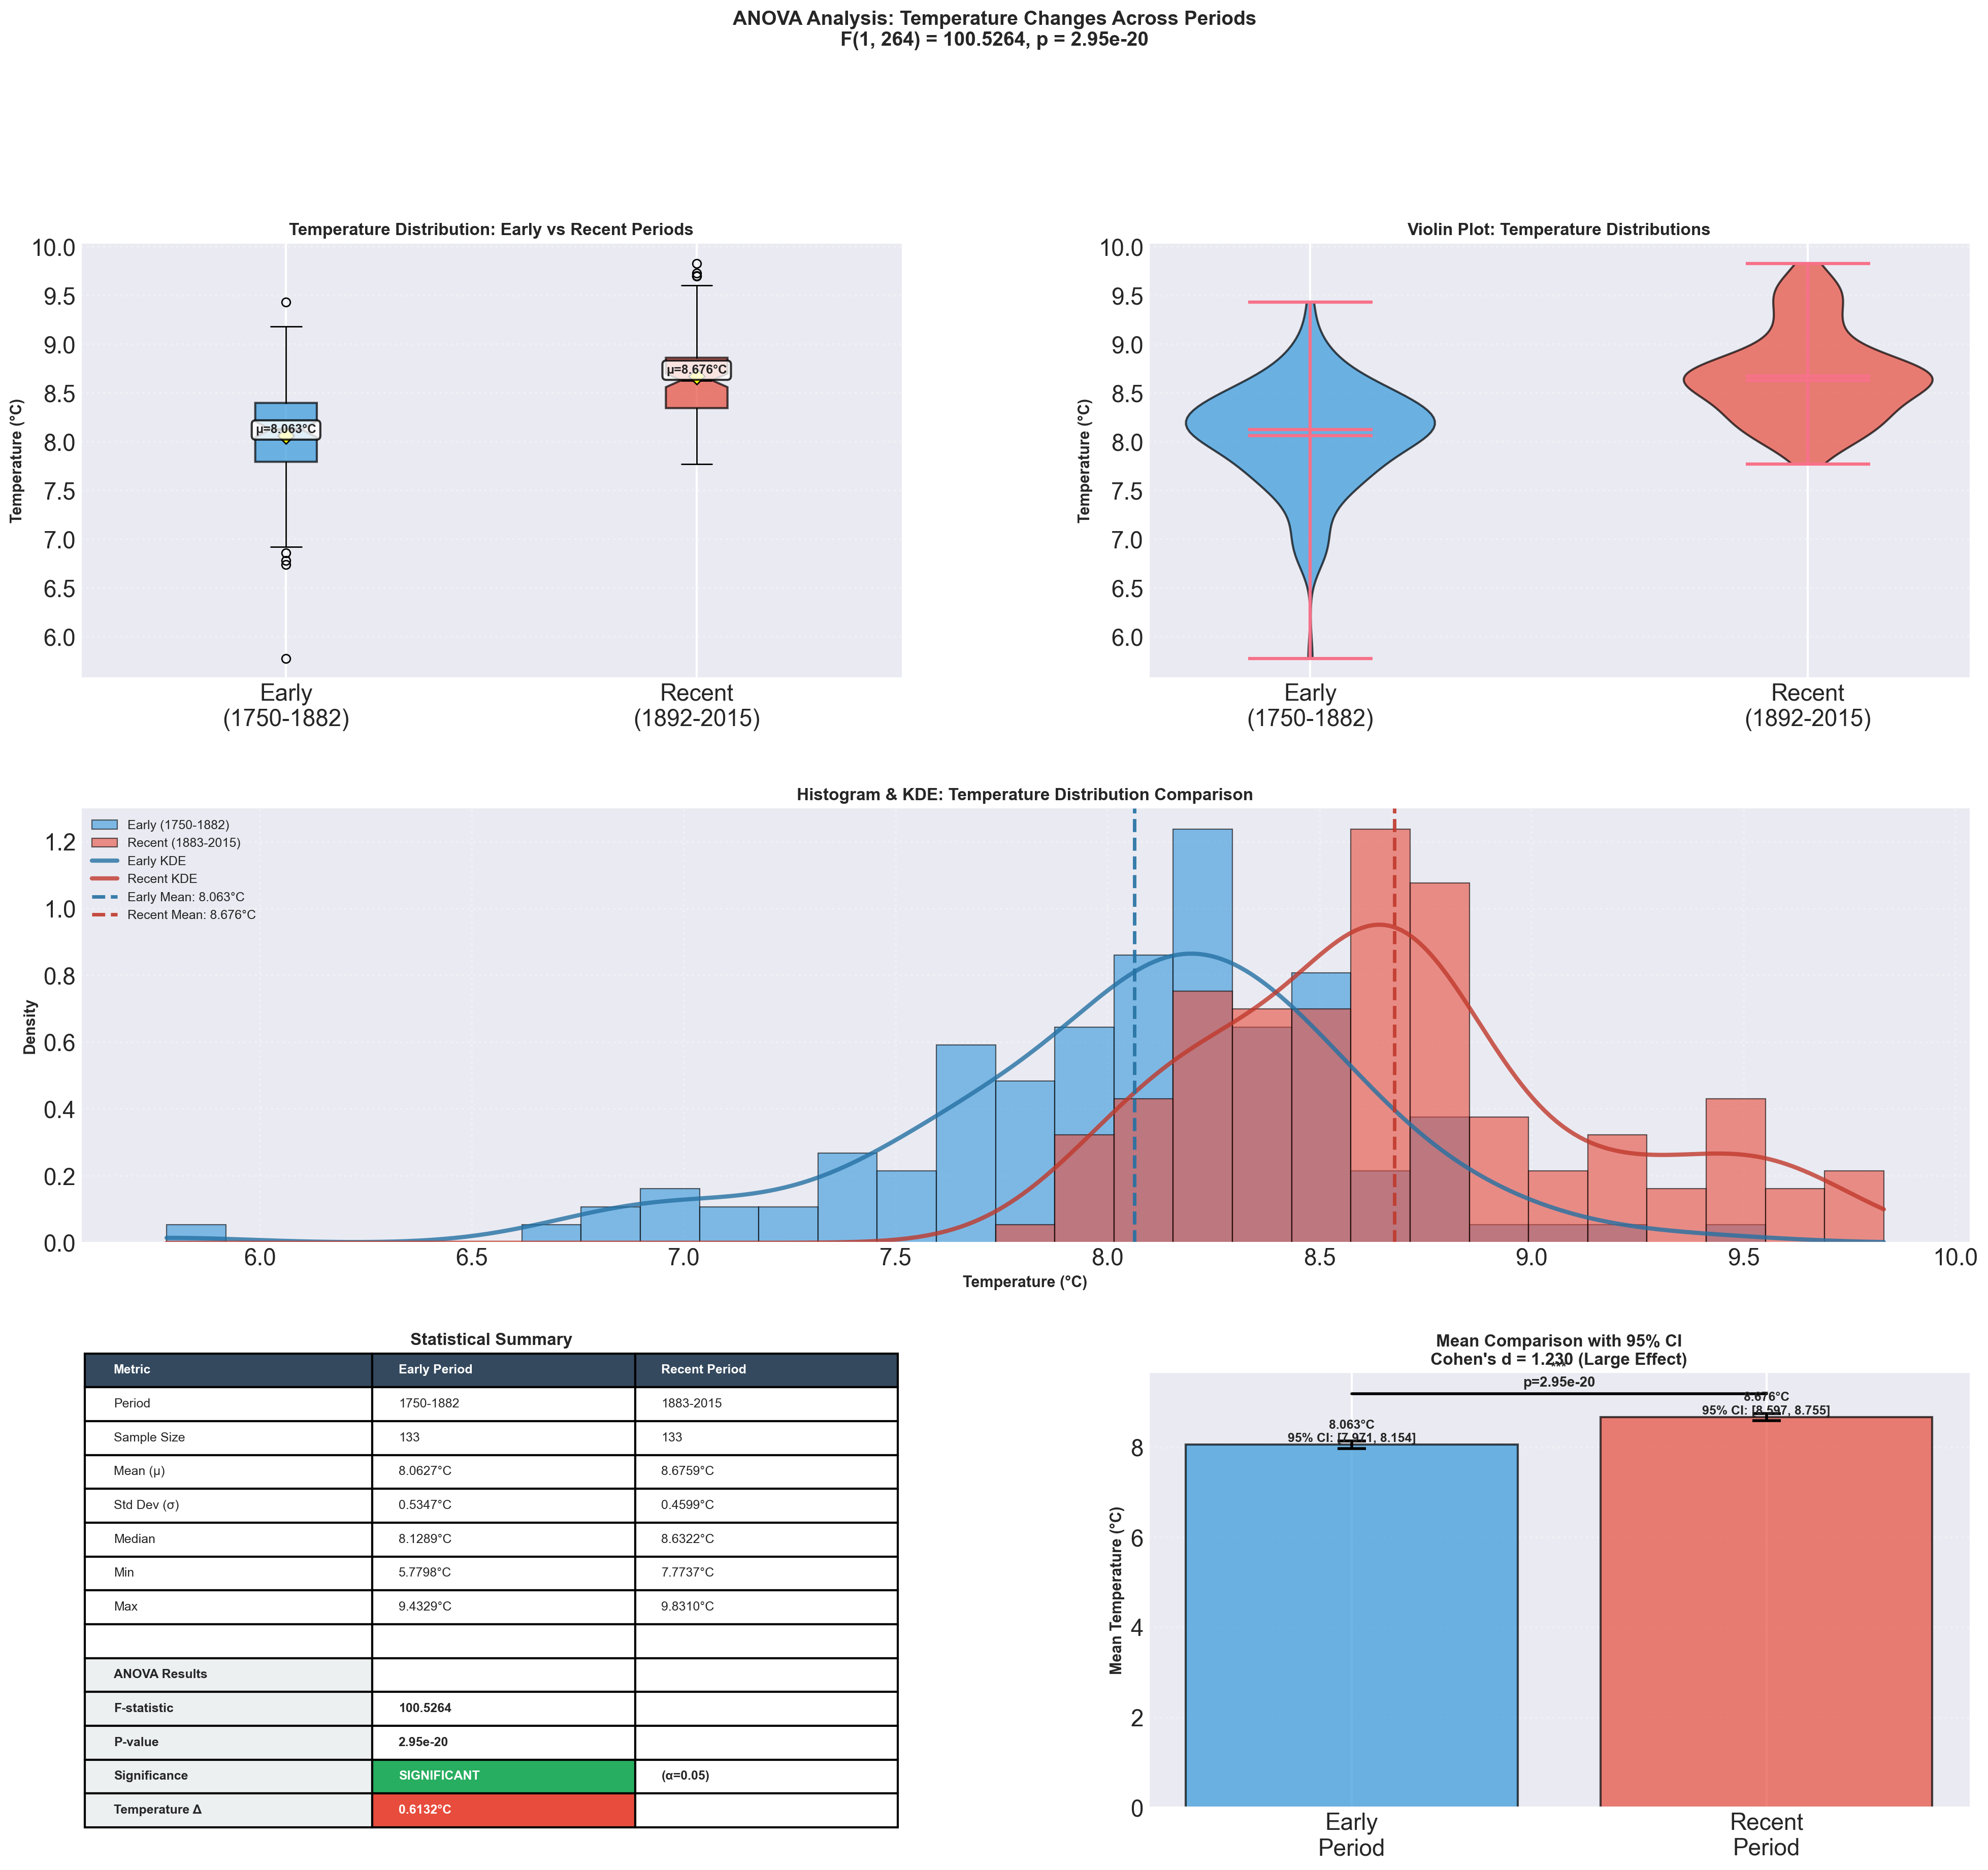

In [680]:
# Split data into early and recent periods
min_year = annual['year'].min()
max_year = annual['year'].max()
median_year = math.floor(np.median(annual['year']))

# Early period:
early_period = annual[annual['year'] <= median_year]['LandAverageTemperature']

# Recent period:
recent_period = annual[annual['year'] > median_year]['LandAverageTemperature']

print("=" * 70)
print("ANOVA TEST SUMMARY")
print("=" * 70)

# Perform one-way ANOVA
f_statistic, anova_pvalue = stats.f_oneway(early_period, recent_period)


print(f"F-statistic:        F({1}, {len(early_period)+len(recent_period)-2}) = {f_statistic:.4f}")
print(f"P-value:            {anova_pvalue:.6e}")
print(f"Significance level: α = {alpha}")
print()
print(f"Early Period:  {min_year}-{median_year}  (n={len(early_period)}, μ={early_period.mean():.4f}°C)")
print(f"Recent Period: {median_year+1}-{max_year} (n={len(recent_period)}, μ={recent_period.mean():.4f}°C)")
print(f"Temperature Difference: {recent_period.mean() - early_period.mean():.4f}°C")
print()
print("=" * 70)

if anova_pvalue < alpha:
    print(f"REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"There ARE statistically significant differences in temperature across decades.")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"There are NO statistically significant differences across decades.")

print("=" * 70)

# Create comprehensive visualizations
fig = plt.figure(figsize=(24, 20))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Box Plot Comparison
ax1 = fig.add_subplot(gs[0, 0])
box_data = [early_period, recent_period]
bp = ax1.boxplot(box_data, labels=[f'Early\n({min_year}-{median_year})', 
                                     f'Recent\n({median_year+10}-{max_year})'],
                 patch_artist=True, notch=True, showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='yellow', markeredgecolor='black', markersize=8),
                 medianprops=dict(color='black', linewidth=2))
# Color the boxes
colors = ['#3498db', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
ax1.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax1.set_title('Temperature Distribution: Early vs Recent Periods', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle=':', axis='y')
# Add mean values as text
for i, data in enumerate([early_period, recent_period]):
    ax1.text(i+1, data.mean(), f'μ={data.mean():.3f}°C', 
             ha='center', va='bottom', fontsize=9, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', alpha=0.8))
# Formatting
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# 2. Violin Plot with Data Points
ax2 = fig.add_subplot(gs[0, 1])
period_data = pd.DataFrame({
    'Period': ['Early']*len(early_period) + ['Recent']*len(recent_period),
    'Temperature': list(early_period) + list(recent_period)
})
parts = ax2.violinplot([early_period, recent_period], 
                       positions=[1, 2], 
                       showmeans=True, showmedians=True, showextrema=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)
ax2.set_xticks([1, 2])
ax2.set_xticklabels([f'Early\n({min_year}-{median_year})', 
                     f'Recent\n({median_year+10}-{max_year})'])
ax2.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax2.set_title('Violin Plot: Temperature Distributions', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle=':', axis='y')
# Formatting
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

# 3. Histogram Comparison with KDE
ax3 = fig.add_subplot(gs[1, :])
bins = np.linspace(min(early_period.min(), recent_period.min()), 
                   max(early_period.max(), recent_period.max()), 30)
ax3.hist(early_period, bins=bins, alpha=0.6, label=f'Early ({min_year}-{median_year})', 
         color='#3498db', density=True, edgecolor='black', linewidth=0.8)
ax3.hist(recent_period, bins=bins, alpha=0.6, label=f'Recent ({median_year+1}-{max_year})', 
         color='#e74c3c', density=True, edgecolor='black', linewidth=0.8)

# Add KDE curves
from scipy.stats import gaussian_kde
kde_early = gaussian_kde(early_period)
kde_recent = gaussian_kde(recent_period)
x_range = np.linspace(min(early_period.min(), recent_period.min()), 
                      max(early_period.max(), recent_period.max()), 300)
ax3.plot(x_range, kde_early(x_range), color='#2471a3', linewidth=3, 
         label='Early KDE', linestyle='-', alpha=0.8)
ax3.plot(x_range, kde_recent(x_range), color='#c0392b', linewidth=3, 
         label='Recent KDE', linestyle='-', alpha=0.8)

# Add vertical lines for means
ax3.axvline(early_period.mean(), color='#2471a3', linestyle='--', linewidth=2.5, 
           label=f'Early Mean: {early_period.mean():.3f}°C', alpha=0.9)
ax3.axvline(recent_period.mean(), color='#c0392b', linestyle='--', linewidth=2.5, 
           label=f'Recent Mean: {recent_period.mean():.3f}°C', alpha=0.9)

ax3.set_xlabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Density', fontsize=11, fontweight='bold')
ax3.set_title('Histogram & KDE: Temperature Distribution Comparison', fontsize=12, fontweight='bold')
ax3.legend(loc='upper left', fontsize=9, framealpha=0.9, edgecolor='black')
ax3.grid(True, alpha=0.3, linestyle=':')
# Formatting
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_linewidth(1.5)
ax3.spines['bottom'].set_linewidth(1.5)

# 4. Statistical Summary Table
ax4 = fig.add_subplot(gs[2, 0])
ax4.axis('off')

stats_summary = [
    ['Metric', 'Early Period', 'Recent Period'],
    ['Period', f'{min_year}-{median_year}', f'{median_year+1}-{max_year}'],
    ['Sample Size', f'{len(early_period)}', f'{len(recent_period)}'],
    ['Mean (μ)', f'{early_period.mean():.4f}°C', f'{recent_period.mean():.4f}°C'],
    ['Std Dev (σ)', f'{early_period.std():.4f}°C', f'{recent_period.std():.4f}°C'],
    ['Median', f'{early_period.median():.4f}°C', f'{recent_period.median():.4f}°C'],
    ['Min', f'{early_period.min():.4f}°C', f'{recent_period.min():.4f}°C'],
    ['Max', f'{early_period.max():.4f}°C', f'{recent_period.max():.4f}°C'],
    ['', '', ''],
    ['ANOVA Results', '', ''],
    ['F-statistic', f'{f_statistic:.4f}', ''],
    ['P-value', f'{anova_pvalue:.2e}', ''],
    ['Significance', f'{"SIGNIFICANT" if anova_pvalue < alpha else "NOT SIGNIFICANT"}', f'(α={alpha})'],
    ['Temperature Δ', f'{recent_period.mean() - early_period.mean():.4f}°C', '']
]

table = ax4.table(cellText=stats_summary, cellLoc='left', loc='center',
                  colWidths=[0.35, 0.32, 0.32])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Color header row
for i in range(3):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color ANOVA section
for i in range(9, 14):
    table[(i, 0)].set_facecolor('#ecf0f1')
    if i >= 9:
        for j in range(3):
            table[(i, j)].set_text_props(weight='bold')

# Highlight significance
if anova_pvalue < alpha:
    table[(12, 1)].set_facecolor('#27ae60')
    table[(12, 1)].set_text_props(color='white', weight='bold')
    table[(13, 1)].set_facecolor('#e74c3c')
    table[(13, 1)].set_text_props(color='white', weight='bold')

ax4.set_title('Statistical Summary', fontsize=12, fontweight='bold', pad=20)

# 5. Effect Size and Confidence Intervals
ax5 = fig.add_subplot(gs[2, 1])

# Calculate Cohen's d (effect size)
pooled_std = np.sqrt((early_period.std()**2 + recent_period.std()**2) / 2)
cohens_d = (recent_period.mean() - early_period.mean()) / pooled_std

# Calculate 95% CI for means
from scipy.stats import t as t_dist
ci_early = t_dist.interval(0.95, len(early_period)-1, 
                           loc=early_period.mean(), 
                           scale=stats.sem(early_period))
ci_recent = t_dist.interval(0.95, len(recent_period)-1, 
                            loc=recent_period.mean(), 
                            scale=stats.sem(recent_period))

# Plot means with error bars
periods = ['Early\nPeriod', 'Recent\nPeriod']
means = [early_period.mean(), recent_period.mean()]
errors = [(early_period.mean() - ci_early[0], ci_recent[1] - recent_period.mean()),
          (recent_period.mean() - ci_recent[0], ci_recent[1] - recent_period.mean())]

bars = ax5.bar(periods, means, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax5.errorbar(periods, means, yerr=errors, fmt='none', ecolor='black', 
             capsize=10, capthick=2, linewidth=2)

# Add value labels on bars
for i, (bar, mean, color) in enumerate(zip(bars, means, colors)):
    ax5.text(bar.get_x() + bar.get_width()/2, mean, 
             f'{mean:.3f}°C\n95% CI: [{ci_early[0] if i==0 else ci_recent[0]:.3f}, '
             f'{ci_early[1] if i==0 else ci_recent[1]:.3f}]',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax5.set_ylabel('Mean Temperature (°C)', fontsize=11, fontweight='bold')
ax5.set_title(f'Mean Comparison with 95% CI\nCohen\'s d = {cohens_d:.3f} '
              f'({"Small" if abs(cohens_d) < 0.5 else "Medium" if abs(cohens_d) < 0.8 else "Large"} Effect)', 
              fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, linestyle=':', axis='y')

# Add significance annotation
if anova_pvalue < alpha:
    y_max = max(means) + max([e[1] for e in errors])
    ax5.plot([0, 1], [y_max*1.05, y_max*1.05], 'k-', linewidth=2)
    ax5.text(0.5, y_max*1.06, f'***\np={anova_pvalue:.2e}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_linewidth(1.5)
ax5.spines['bottom'].set_linewidth(1.5)

# Main title
plt.suptitle(f'ANOVA Analysis: Temperature Changes Across Periods\n'
             f'F({1}, {len(early_period)+len(recent_period)-2}) = {f_statistic:.4f}, '
             f'p = {anova_pvalue:.2e}',
             fontsize=14, fontweight='bold', y=0.995)

plt.show()


## Mann-Kendall Trend Test on Land Temperature with Uncertainty

### Overview
This analysis examines the trend in annual land temperature when combined with measurement uncertainty. By adding the mean temperature and mean uncertainty together, we create a conservative estimate that accounts for potential measurement error.

In [668]:
# Calculate annual mean land temperature and mean uncertainty
annual_with_uncertainty = df.groupby('year').agg({
    'LandAverageTemperature': 'mean',
    'LandAverageTemperatureUncertainty': 'mean'
}).reset_index()

# Rename columns for clarity
annual_with_uncertainty.columns = ['year', 'mean_land_temp', 'mean_uncertainty']

# Create new column: land temperature with uncertainty
annual_with_uncertainty['land_temp_with_uncertainty'] = (
    annual_with_uncertainty['mean_land_temp'] + 
    annual_with_uncertainty['mean_uncertainty']
)

# Display the first few rows
print("=" * 70)
print(f"Summary Statistics:")
print("=" * 70)
print(annual_with_uncertainty[['mean_land_temp', 'mean_uncertainty', 'land_temp_with_uncertainty']].describe())
print()

Summary Statistics:
       mean_land_temp  mean_uncertainty  land_temp_with_uncertainty
count      266.000000        266.000000                  266.000000
mean         8.369337          0.945719                    9.315056
std          0.584921          0.994110                    0.912942
min          5.779833          0.062083                    8.169917
25%          8.081563          0.210208                    8.703146
50%          8.372167          0.405583                    8.956667
75%          8.704167          1.629563                    9.693333
max          9.831000          4.026000                   13.048000



In [669]:
# Perform Mann-Kendall test on land_temp_with_uncertainty
mk_result = mk.original_test(annual_with_uncertainty['land_temp_with_uncertainty'])

# Set significance level
alpha = 0.05

# Print results in standard format
print("=" * 70)
print("MANN-KENDALL TREND TEST")
print("Variable: Land Temperature with Uncertainty (Mean Land Temp + Mean Uncertainty)")
print("=" * 70)
print(f"Sample size (n):          {len(annual_with_uncertainty)}")
print(f"Test statistic (S):       {mk_result.s}")
print(f"Normalized test stat (Z): {mk_result.z:.4f}")
print(f"Kendall's Tau:            {mk_result.Tau:.4f}")
print(f"P-value (two-tailed):     {mk_result.p:.6e}")
print(f"Significance level (α):   {alpha}")
print(f"Trend:                    {mk_result.trend}")
print(f"Sen's slope:              {mk_result.slope:.6f} °C/year")
print(f"Intercept:                {mk_result.intercept:.4f}")
print("=" * 70)

# Hypothesis test interpretation
print()
print("HYPOTHESIS TEST INTERPRETATION:")
print("=" * 70)
if mk_result.p < alpha:
    print(f"REJECT NULL HYPOTHESIS (p = {mk_result.p:.6e} < α = {alpha})")
    print()
    print(f"There IS a statistically significant monotonic trend in land temperature")
    print(f"with uncertainty over time.")
    print()
    print(f"Trend direction: {mk_result.trend.upper()}")
    print(f"Rate of change:  {mk_result.slope:.6f} °C/year")
    print()
    if mk_result.slope > 0:
        print(f"The land temperature (including uncertainty) is INCREASING over time.")
    else:
        print(f"The land temperature (including uncertainty) is DECREASING over time.")
else:
    print(f"FAIL TO REJECT NULL HYPOTHESIS (p = {mk_result.p:.6e} >= α = {alpha})")
    print()
    print(f"There is NO statistically significant monotonic trend detected.")
    
print("=" * 70)

MANN-KENDALL TREND TEST
Variable: Land Temperature with Uncertainty (Mean Land Temp + Mean Uncertainty)
Sample size (n):          266
Test statistic (S):       -10303.0
Normalized test stat (Z): -7.1041
Kendall's Tau:            -0.2923
P-value (two-tailed):     1.211475e-12
Significance level (α):   0.05
Trend:                    decreasing
Sen's slope:              -0.004927 °C/year
Intercept:                9.6095

HYPOTHESIS TEST INTERPRETATION:
REJECT NULL HYPOTHESIS (p = 1.211475e-12 < α = 0.05)

There IS a statistically significant monotonic trend in land temperature
with uncertainty over time.

Trend direction: DECREASING
Rate of change:  -0.004927 °C/year

The land temperature (including uncertainty) is DECREASING over time.


#### Visualization
Four complementary plots provide comprehensive insight:

1. **Time Series with Sen's Slope**: Shows actual data with the fitted trend line
2. **Scatter Plot with Uncertainty Coloring**: Visualizes how uncertainty varies over time
3. **Component Breakdown**: Displays temperature, uncertainty, and combined values separately
4. **Distribution Analysis**: Examines the overall distribution of the combined metric

### Interpretation
The results reveal whether land temperature (accounting for uncertainty) shows a statistically significant increasing or decreasing trend over the 266-year period (1750-2015), providing robust evidence for climate change analysis.

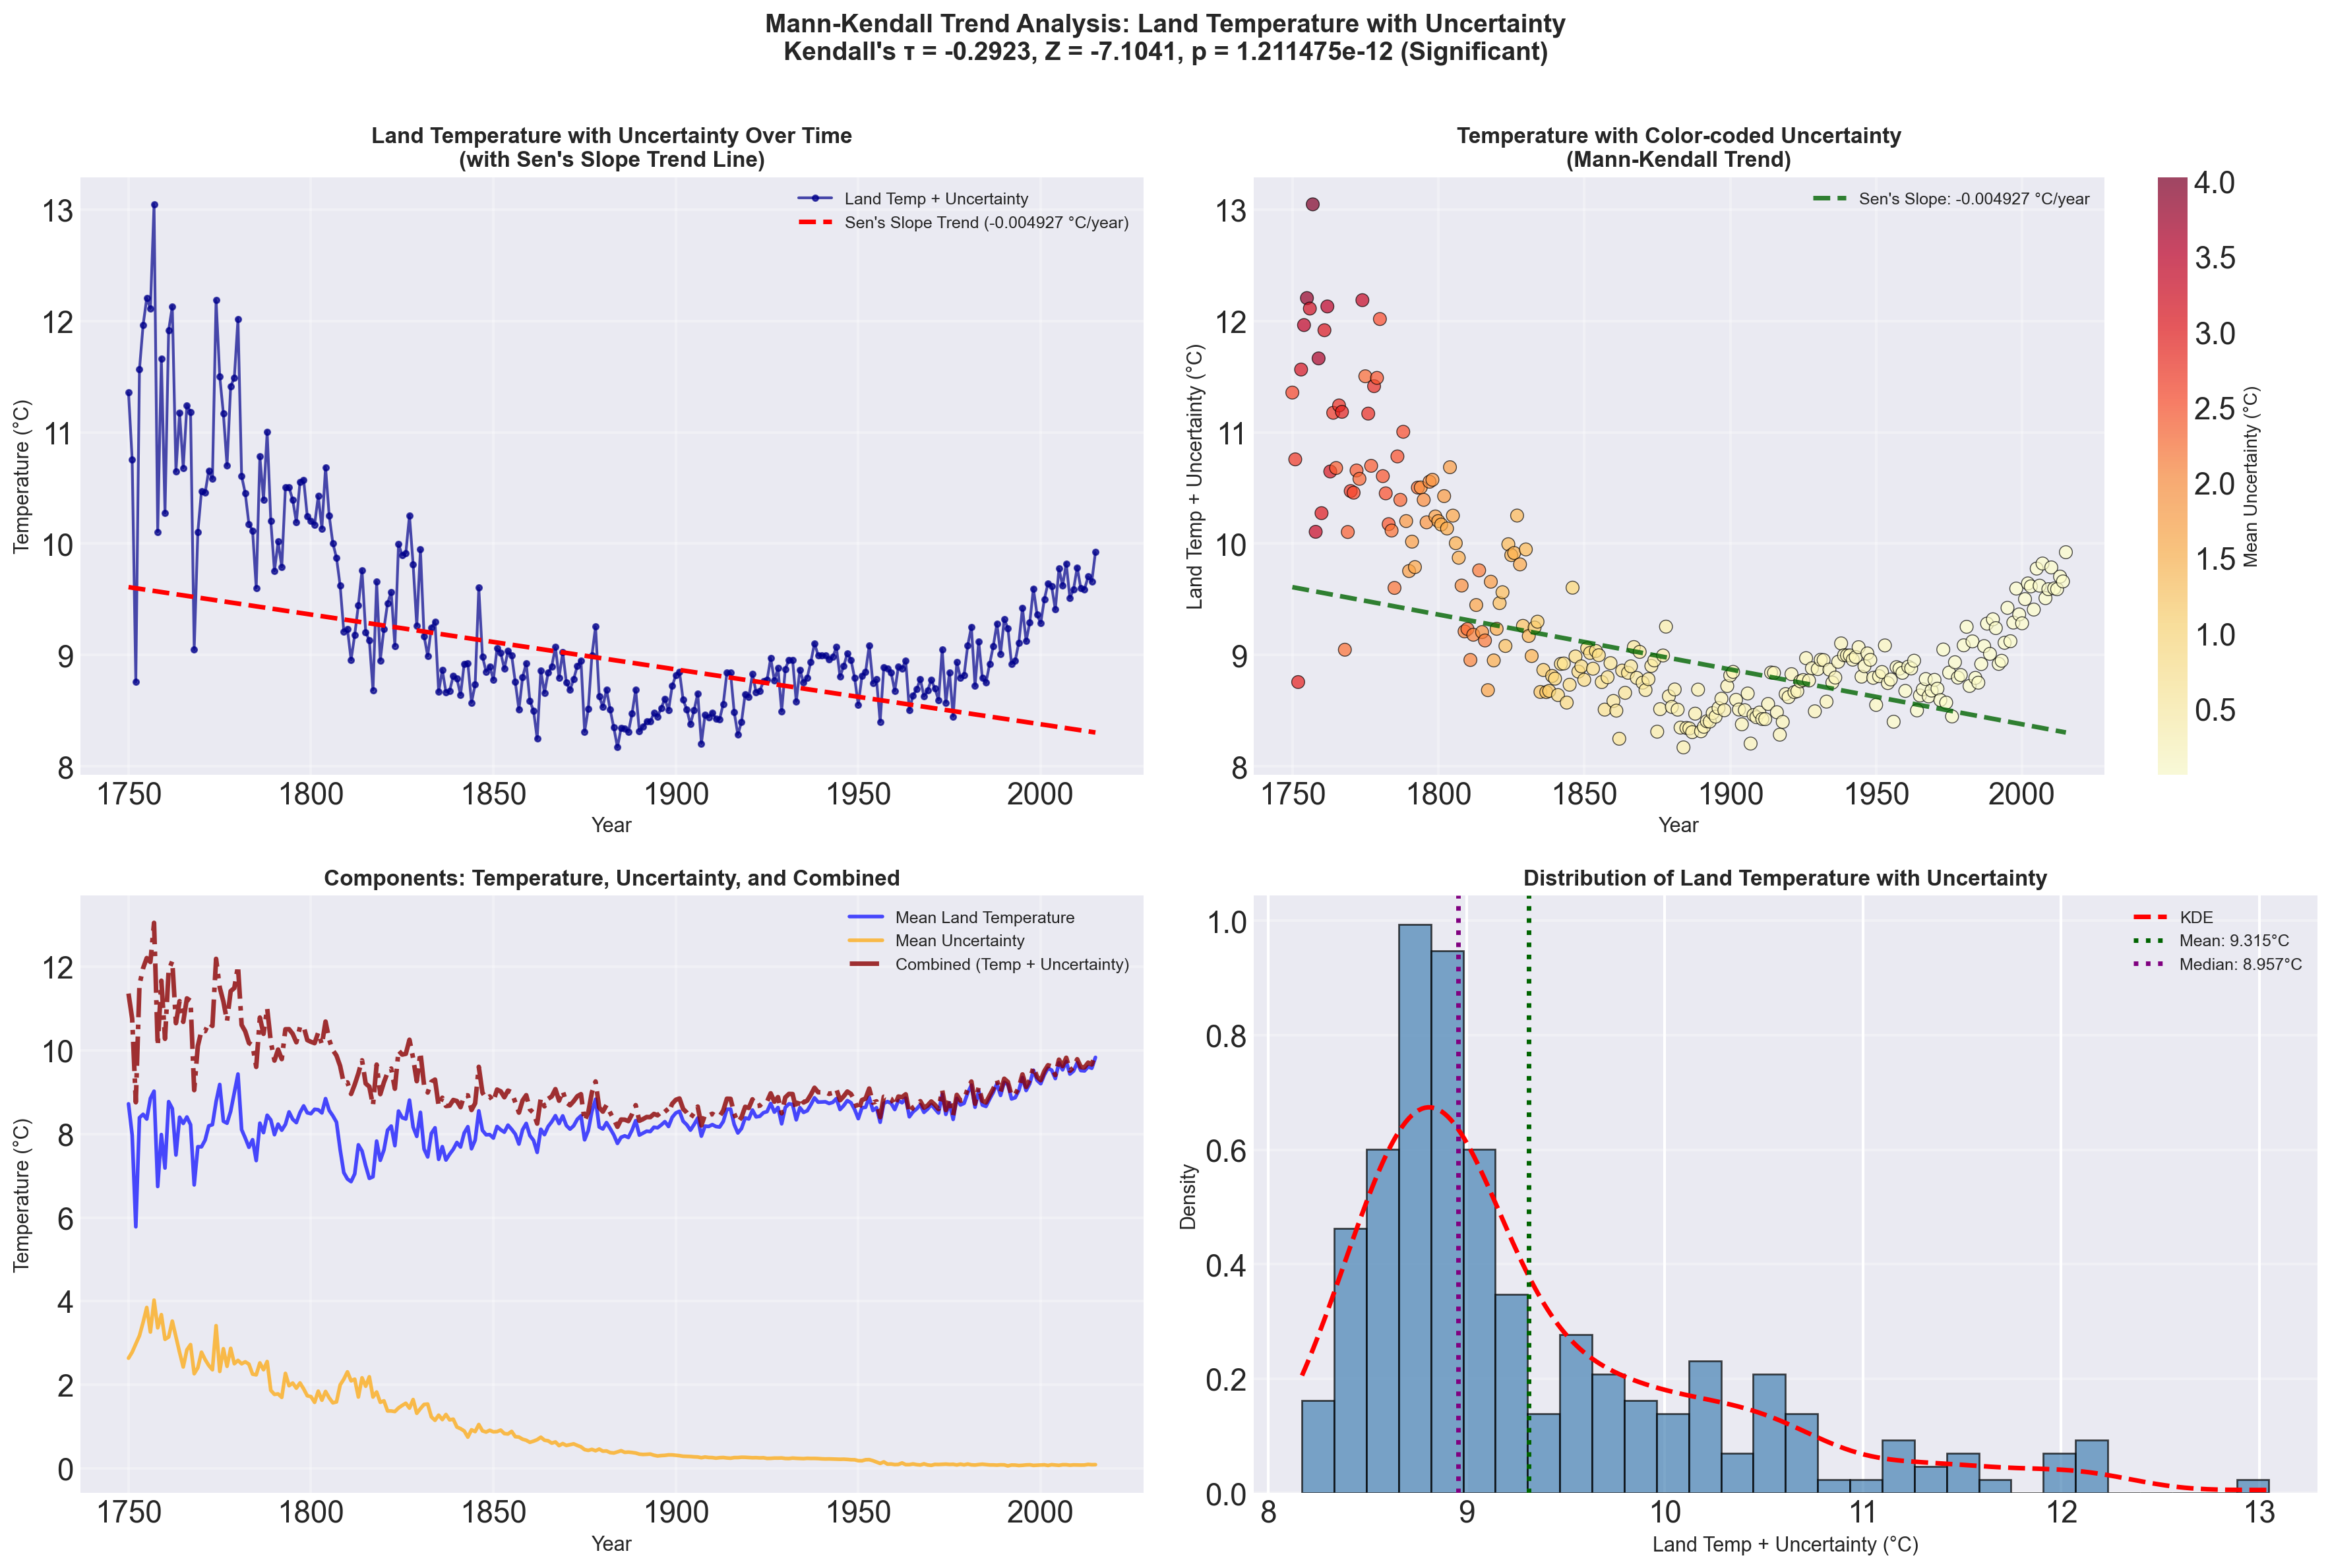

In [670]:
# Visualization: Mann-Kendall Trend Analysis Plot
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Time series with Sen's slope trend line
ax1 = axes[0, 0]
ax1.plot(annual_with_uncertainty['year'], 
         annual_with_uncertainty['land_temp_with_uncertainty'],
         color='darkblue', linewidth=1.5, marker='o', markersize=3,
         label='Land Temp + Uncertainty', alpha=0.7)

# Calculate Sen's slope trend line
x = annual_with_uncertainty['year']
y = annual_with_uncertainty['land_temp_with_uncertainty']
median_year_val = x.median()
median_temp = y.median()
sen_line = mk_result.slope * (x - median_year_val) + median_temp

ax1.plot(x, sen_line, color='red', linestyle='--', linewidth=2.5,
         label=f"Sen's Slope Trend ({mk_result.slope:.6f} °C/year)")
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Temperature (°C)', fontsize=11)
ax1.set_title('Land Temperature with Uncertainty Over Time\n(with Sen\'s Slope Trend Line)', 
              fontsize=12, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Scatter plot with uncertainty bounds
ax2 = axes[0, 1]
ax2.scatter(annual_with_uncertainty['year'], 
            annual_with_uncertainty['land_temp_with_uncertainty'],
            c=annual_with_uncertainty['mean_uncertainty'], cmap='YlOrRd', 
            s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
cbar = plt.colorbar(ax2.collections[0], ax=ax2)
cbar.set_label('Mean Uncertainty (°C)', fontsize=10)

# Add Sen's slope line
ax2.plot(x, sen_line, color='darkgreen', linestyle='--', linewidth=2.5,
         label=f"Sen's Slope: {mk_result.slope:.6f} °C/year", alpha=0.8)
ax2.set_xlabel('Year', fontsize=11)
ax2.set_ylabel('Land Temp + Uncertainty (°C)', fontsize=11)
ax2.set_title('Temperature with Color-coded Uncertainty\n(Mann-Kendall Trend)', 
              fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Components visualization
ax3 = axes[1, 0]
ax3.plot(annual_with_uncertainty['year'], 
         annual_with_uncertainty['mean_land_temp'],
         label='Mean Land Temperature', color='blue', linewidth=2, alpha=0.7)
ax3.plot(annual_with_uncertainty['year'], 
         annual_with_uncertainty['mean_uncertainty'],
         label='Mean Uncertainty', color='orange', linewidth=2, alpha=0.7)
ax3.plot(annual_with_uncertainty['year'], 
         annual_with_uncertainty['land_temp_with_uncertainty'],
         label='Combined (Temp + Uncertainty)', color='darkred', 
         linewidth=2.5, alpha=0.8, linestyle='-.')
ax3.set_xlabel('Year', fontsize=11)
ax3.set_ylabel('Temperature (°C)', fontsize=11)
ax3.set_title('Components: Temperature, Uncertainty, and Combined', 
              fontsize=12, fontweight='bold')
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Distribution of land_temp_with_uncertainty
ax4 = axes[1, 1]
ax4.hist(annual_with_uncertainty['land_temp_with_uncertainty'], 
         bins=30, color='steelblue', alpha=0.7, edgecolor='black', 
         linewidth=1, density=True)
# Add KDE
from scipy.stats import gaussian_kde
kde = gaussian_kde(annual_with_uncertainty['land_temp_with_uncertainty'])
x_range = np.linspace(annual_with_uncertainty['land_temp_with_uncertainty'].min(),
                      annual_with_uncertainty['land_temp_with_uncertainty'].max(), 300)
ax4.plot(x_range, kde(x_range), color='red', linewidth=2.5, 
         label='KDE', linestyle='--')
ax4.axvline(annual_with_uncertainty['land_temp_with_uncertainty'].mean(), 
            color='darkgreen', linestyle=':', linewidth=2.5,
            label=f"Mean: {annual_with_uncertainty['land_temp_with_uncertainty'].mean():.3f}°C")
ax4.axvline(annual_with_uncertainty['land_temp_with_uncertainty'].median(), 
            color='purple', linestyle=':', linewidth=2.5,
            label=f"Median: {annual_with_uncertainty['land_temp_with_uncertainty'].median():.3f}°C")
ax4.set_xlabel('Land Temp + Uncertainty (°C)', fontsize=11)
ax4.set_ylabel('Density', fontsize=11)
ax4.set_title('Distribution of Land Temperature with Uncertainty', 
              fontsize=12, fontweight='bold')
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

# Main title with test statistics
fig.suptitle(f'Mann-Kendall Trend Analysis: Land Temperature with Uncertainty\n'
             f'Kendall\'s τ = {mk_result.Tau:.4f}, Z = {mk_result.z:.4f}, '
             f'p = {mk_result.p:.6e} ({"Significant" if mk_result.p < 0.05 else "Not Significant"})',
             fontsize=14, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

## Summary of Hypothesis Testing Results

### Overview
This section consolidates results from **five independent statistical tests** examining temperature trends from 1750-2015:

**Tests on Land Temperature Only:**
1. Linear Regression Analysis
2. Mann-Kendall Trend Test (non-parametric)
3. Independent t-test (Early vs Recent periods)
4. ANOVA (Across time periods)

**Test on Temperature with Measurement Uncertainty:**
5. Mann-Kendall Test on Land Temperature + Uncertainty

Each test provides unique insights into the nature and significance of climate trends.

In [671]:
print("=" * 70)
print("COMPREHENSIVE HYPOTHESIS TESTING SUMMARY")
print("=" * 70)
print()
print("Research Question: Are there significant changes in temperature over time?")
print()
print("H₀ (Null): No significant changes in temperature over time")
print("H₁ (Alternative): Significant changes exist over time")
print(f"Significance level (α): {alpha}")
print()
print("=" * 70)
print()

# Section 1: Tests on Land Temperature
print("SECTION 1: TESTS ON LAND AVERAGE TEMPERATURE")
print("-" * 70)
summary_data_temp = {
    'Test': [
        '1. Linear Regression',
        '2. Mann-Kendall',
        '3. t-test (Early vs Recent)',
        '4. ANOVA (Periods)'
    ],
    'Statistic': [
        f"β = {slope:.6f} °C/yr",
        f"τ = {result.Tau:.4f}",
        f"t = {t_statistic:.4f}",
        f"F = {f_statistic:.4f}"
    ],
    'P-value': [
        f"{p_value:.2e}",
        f"{result.p:.2e}",
        f"{t_pvalue:.2e}",
        f"{anova_pvalue:.2e}"
    ],
    'Decision': [
        'Reject H₀' if p_value < alpha else 'Retain H₀',
        'Reject H₀' if result.p < alpha else 'Retain H₀',
        'Reject H₀' if t_pvalue < alpha else 'Retain H₀',
        'Reject H₀' if anova_pvalue < alpha else 'Retain H₀'
    ]
}

summary_temp_df = pd.DataFrame(summary_data_temp)
print(summary_temp_df.to_string(index=False))
print()
print("KEY FINDINGS (Land Temperature):")
print(f"Linear warming rate: {slope:.6f} °C/year (R² = {r_value**2:.4f})")
print(f"Sen's slope estimate: {result.slope:.6f} °C/year")
print(f"Temperature change: {recent_period.mean() - early_period.mean():.4f} °C")
print(f"Early period ({min_year}-{median_year}): {early_period.mean():.4f} °C")
print(f"Recent period ({median_year+1}-{max_year}): {recent_period.mean():.4f} °C")
print()

# Check if all temperature tests reject H₀
temp_tests_reject = all([
    p_value < alpha,
    result.p < alpha,
    t_pvalue < alpha,
    anova_pvalue < alpha
])

if temp_tests_reject:
    print("CONCLUSION FOR LAND TEMPERATURE TESTS:")
    print("ALL FOUR TESTS REJECT H₀")
    print()
    print("STRONG STATISTICAL EVIDENCE confirms:")
    print("Significant WARMING trend in land temperatures (1750-2015)")
    print("Consistent results across parametric and non-parametric tests")
    print("Temperature increase is statistically significant at p < 0.001")
else:
    print("CONCLUSION FOR LAND TEMPERATURE TESTS:")
    print("Results are MIXED or INCONCLUSIVE")
    print("Not all tests reject the null hypothesis.")

print()
print("=" * 70)

COMPREHENSIVE HYPOTHESIS TESTING SUMMARY

Research Question: Are there significant changes in temperature over time?

H₀ (Null): No significant changes in temperature over time
H₁ (Alternative): Significant changes exist over time
Significance level (α): 0.05


SECTION 1: TESTS ON LAND AVERAGE TEMPERATURE
----------------------------------------------------------------------
                       Test          Statistic  P-value  Decision
       1. Linear Regression β = 0.004732 °C/yr 6.47e-30 Reject H₀
            2. Mann-Kendall         τ = 0.4823 0.00e+00 Reject H₀
3. t-test (Early vs Recent)       t = -10.0263 2.95e-20 Reject H₀
         4. ANOVA (Periods)       F = 100.5264 2.95e-20 Reject H₀

KEY FINDINGS (Land Temperature):
Linear warming rate: 0.004732 °C/year (R² = 0.3873)
Sen's slope estimate: 0.005203 °C/year
Temperature change: 0.6132 °C
Early period (1750-1882): 8.0627 °C
Recent period (1883-2015): 8.6759 °C

CONCLUSION FOR LAND TEMPERATURE TESTS:
ALL FOUR TESTS REJECT H₀

## Summary: Mann-Kendall Test on Temperature with Uncertainty

This test examines a **different question** than the previous four tests. Instead of testing temperature trends alone, it analyzes the combined metric of temperature plus measurement uncertainty to understand how data quality has evolved over time.

In [672]:
print("=" * 70)
print("SECTION 2: MANN-KENDALL TEST ON TEMPERATURE WITH UNCERTAINTY")
print("=" * 70)
print()
print("Research Question: Does the combined metric (Temperature + Uncertainty)")
print("                   show a significant trend over time?")
print()
print("H₀ (Null): No monotonic trend in Temperature + Uncertainty")
print("H₁ (Alternative): Significant monotonic trend exists")
print(f"Significance level (α): {alpha}")
print()
print("-" * 70)

# Create summary table for uncertainty test
summary_data_unc = {
    'Test': [
        '5. Mann-Kendall (Temp + Uncertainty)'
    ],
    'Statistic': [
        f"τ = {mk_result.Tau:.4f}"
    ],
    'Sen\'s Slope': [
        f"{mk_result.slope:.6f} °C/yr"
    ],
    'P-value': [
        f"{mk_result.p:.2e}"
    ],
    'Decision': [
        'Reject H₀' if mk_result.p < alpha else 'Retain H₀'
    ]
}

summary_unc_df = pd.DataFrame(summary_data_unc)
print(summary_unc_df.to_string(index=False))
print()
print("-" * 70)
print()
print("KEY FINDINGS (Temperature + Uncertainty):")
print(f"  • Variable analyzed: Mean Land Temperature + Mean Uncertainty")
print(f"  • Trend direction: {mk_result.trend.upper()}")
print(f"  • Sen's slope: {mk_result.slope:.6f} °C/year")
print(f"  • Kendall's Tau: {mk_result.Tau:.4f}")
print(f"  • Test statistic (Z): {mk_result.z:.4f}")
print(f"  • P-value: {mk_result.p:.6e}")
print()

# Interpret the result
if mk_result.p < alpha:
    print("CONCLUSION FOR TEMPERATURE + UNCERTAINTY TEST:")
    print("✓ REJECT H₀")
    print()
    if mk_result.slope < 0:
        print("INTERPRETATION: Measurement Quality Has IMPROVED Over Time")
        print("  → The combined metric (Temp + Uncertainty) is DECREASING")
        print("  → This indicates uncertainty is decreasing faster than temperature rises")
        print("  → Modern measurements are MORE PRECISE than historical records")
        print("  → High-quality instruments and methods have reduced measurement error")
        print()
        print("IMPLICATION:")
        print("  → Recent temperature data is MORE RELIABLE than early records")
        print("  → Confidence in contemporary warming trends is JUSTIFIED")
        print("  → Historical temperature estimates had larger error margins")
    else:
        print("INTERPRETATION: Combined Metric is INCREASING Over Time")
        print("  → Either temperature rise exceeds precision improvements, OR")
        print("  → Measurement uncertainty has increased")
        print("  → Requires careful examination of recent data quality")
        print()
        print("IMPLICATION:")
        print("  → May indicate evolving measurement methodologies")
        print("  → Temperature increase dominates the signal")
else:
    print("CONCLUSION FOR TEMPERATURE + UNCERTAINTY TEST:")
    print("✗ RETAIN H₀")
    print()
    print("INTERPRETATION:")
    print("  → No significant trend in combined temperature+uncertainty metric")
    print("  → Changes in temperature are balanced by changes in uncertainty")
    print("  → Data quality has remained relatively stable over time")

print()
print("=" * 70)
print("COMPARISON: Temperature vs Temperature + Uncertainty")
print("=" * 70)
print(f"Land Temperature alone:     {result.trend.upper():>12} (τ = {result.Tau:>7.4f}, slope = {result.slope:>9.6f} °C/yr)")
print(f"Temperature + Uncertainty:  {mk_result.trend.upper():>12} (τ = {mk_result.Tau:>7.4f}, slope = {mk_result.slope:>9.6f} °C/yr)")
print()
if result.slope > 0 and mk_result.slope < 0:
    print("KEY INSIGHT:")
    print("  • Temperature is INCREASING (warming trend)")
    print("  • But Temperature + Uncertainty is DECREASING")
    print("  • This means: Measurement uncertainty has IMPROVED dramatically")
    print("  • The improvement in precision exceeds the temperature increase")
elif result.slope > 0 and mk_result.slope > 0:
    print("KEY INSIGHT:")
    print("  • Both metrics show INCREASING trends")
    print("  • Temperature rise is the dominant signal")
    print("  • Uncertainty improvements cannot offset temperature increases")
else:
    print("KEY INSIGHT:")
    print("  • Different trend patterns observed")
    print("  • Complex interaction between temperature change and data quality")
print("=" * 70)

SECTION 2: MANN-KENDALL TEST ON TEMPERATURE WITH UNCERTAINTY

Research Question: Does the combined metric (Temperature + Uncertainty)
                   show a significant trend over time?

H₀ (Null): No monotonic trend in Temperature + Uncertainty
H₁ (Alternative): Significant monotonic trend exists
Significance level (α): 0.05

----------------------------------------------------------------------
                                Test   Statistic     Sen's Slope  P-value  Decision
5. Mann-Kendall (Temp + Uncertainty) τ = -0.2923 -0.004927 °C/yr 1.21e-12 Reject H₀

----------------------------------------------------------------------

KEY FINDINGS (Temperature + Uncertainty):
  • Variable analyzed: Mean Land Temperature + Mean Uncertainty
  • Trend direction: DECREASING
  • Sen's slope: -0.004927 °C/year
  • Kendall's Tau: -0.2923
  • Test statistic (Z): -7.1041
  • P-value: 1.211475e-12

CONCLUSION FOR TEMPERATURE + UNCERTAINTY TEST:
✓ REJECT H₀

INTERPRETATION: Measurement Quality H